## Sales perfomance prediction, classification & clustering video games based on categorical variables

In [1]:
# import necessary libraries
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
)
from sklearn.metrics import (
    v_measure_score, 
    adjusted_mutual_info_score, 
    adjusted_rand_score, 
    davies_bouldin_score, 
    silhouette_score,
    calinski_harabasz_score
)

from imblearn.over_sampling import SMOTE

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv("./Video_Games.csv")

## Data Cleaning & Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Investigage User_Score

In [4]:
#  check unique User_Score values
df["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
# replace 'tbd' with NaN in 'User_Score' column
df[df["User_Score"] == "tbd"]
df["User_Score"].replace("tbd", np.NaN, inplace=True)

# convert user score to numeric dtype
df['User_Score'] = pd.to_numeric(df['User_Score'])

# verify, no more tbd
df["User_Score"].unique()

# print info for inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


### Investigate Name

In [6]:
# check unique values
df["Name"].unique()

# check number of unique values
df["Name"].nunique()

# print out na rows
df[df["Name"].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check if we can infere from platform

# check same publisher
df[df["Publisher"] == "Acclaim Entertainment"]

# df[(df["Publisher"] == "Acclaim Entertainment") & (df["Platform"] == "GEN")]

# df[df["Publisher"] == "Acclaim Entertainment"]["Genre"].value_counts()

# we couldn't infere from mode genre or name of publisher so we drop them since they're just 2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
399,WWF War Zone,PS,1998.0,Fighting,Acclaim Entertainment,2.47,0.76,0.00,0.13,3.36,NaN,NaN,NaN,NaN,NaN,NaN
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52,80.0,15.0,7.9,46.0,Acclaim Studios Cheltenham,T
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993.0,Fighting,Acclaim Entertainment,1.48,0.39,0.00,0.06,1.93,NaN,NaN,NaN,NaN,NaN,NaN
933,Turok 2: Seeds of Evil,N64,1997.0,Platform,Acclaim Entertainment,1.37,0.41,0.04,0.04,1.86,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,XGRA: Extreme G Racing Association,GC,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,69.0,13.0,7.0,5.0,Acclaim Studios Cheltenham,T
15487,XGRA: Extreme G Racing Association,XB,2003.0,Racing,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,66.0,15.0,6.8,5.0,Acclaim Studios Cheltenham,T
15553,Mortal Kombat,PC,1994.0,Fighting,Acclaim Entertainment,0.02,0.00,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
15581,Speed Kings,GC,2003.0,Racing,Acclaim Entertainment,0.01,0.00,0.00,0.00,0.02,59.0,9.0,NaN,NaN,Climax Group,E


In [8]:
# drop empty names
df.drop(df[df["Name"].isna()].index, inplace=True)

In [9]:
# print out number of empty strings for every column where dtype is "object"
for column_name, dtype in df.dtypes.to_dict().items():
    if dtype == "object":
        rows_with_empty_cells = df[df[column_name].str.strip() == '']
        print(f"empty values for {column_name}: {len(rows_with_empty_cells)}")

empty values for Name: 0
empty values for Platform: 0
empty values for Genre: 0
empty values for Publisher: 0
empty values for Developer: 0
empty values for Rating: 0


In [10]:
# confirm with .info

# df.info()
df.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         9127
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

### Investigate Publisher

In [11]:
# check unique values
df["Publisher"].nunique()

# check number of unique values
df["Publisher"].unique()

# print out info for na entries
df[df["Publisher"].isna()].info() # 54 entries

# let's look at other columns with lots of missing data

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 475 to 16662
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             54 non-null     object 
 1   Platform         54 non-null     object 
 2   Year_of_Release  32 non-null     float64
 3   Genre            54 non-null     object 
 4   Publisher        0 non-null      object 
 5   NA_Sales         54 non-null     float64
 6   EU_Sales         54 non-null     float64
 7   JP_Sales         54 non-null     float64
 8   Other_Sales      54 non-null     float64
 9   Global_Sales     54 non-null     float64
 10  Critic_Score     4 non-null      float64
 11  Critic_Count     4 non-null      float64
 12  User_Score       6 non-null      float64
 13  User_Count       6 non-null      float64
 14  Developer        9 non-null      object 
 15  Rating           7 non-null      object 
dtypes: float64(10), object(6)
memory usage: 7.2+ KB


### Investigate Critic Score and Count

In [12]:
df[(df["Critic_Score"].isna()) & (df["Critic_Count"].isna())]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# percentage of missing values
df_total = len(df)

for col, null_sum in df.isna().sum().items():
    print(f"{col}: {null_sum} - {((null_sum/df_total) * 100):.2f}%")

Name: 0 - 0.00%
Platform: 0 - 0.00%
Year_of_Release: 269 - 1.61%
Genre: 0 - 0.00%
Publisher: 54 - 0.32%
NA_Sales: 0 - 0.00%
EU_Sales: 0 - 0.00%
JP_Sales: 0 - 0.00%
Other_Sales: 0 - 0.00%
Global_Sales: 0 - 0.00%
Critic_Score: 8580 - 51.32%
Critic_Count: 8580 - 51.32%
User_Score: 9127 - 54.60%
User_Count: 9127 - 54.60%
Developer: 6621 - 39.61%
Rating: 6767 - 40.48%


<Axes: >

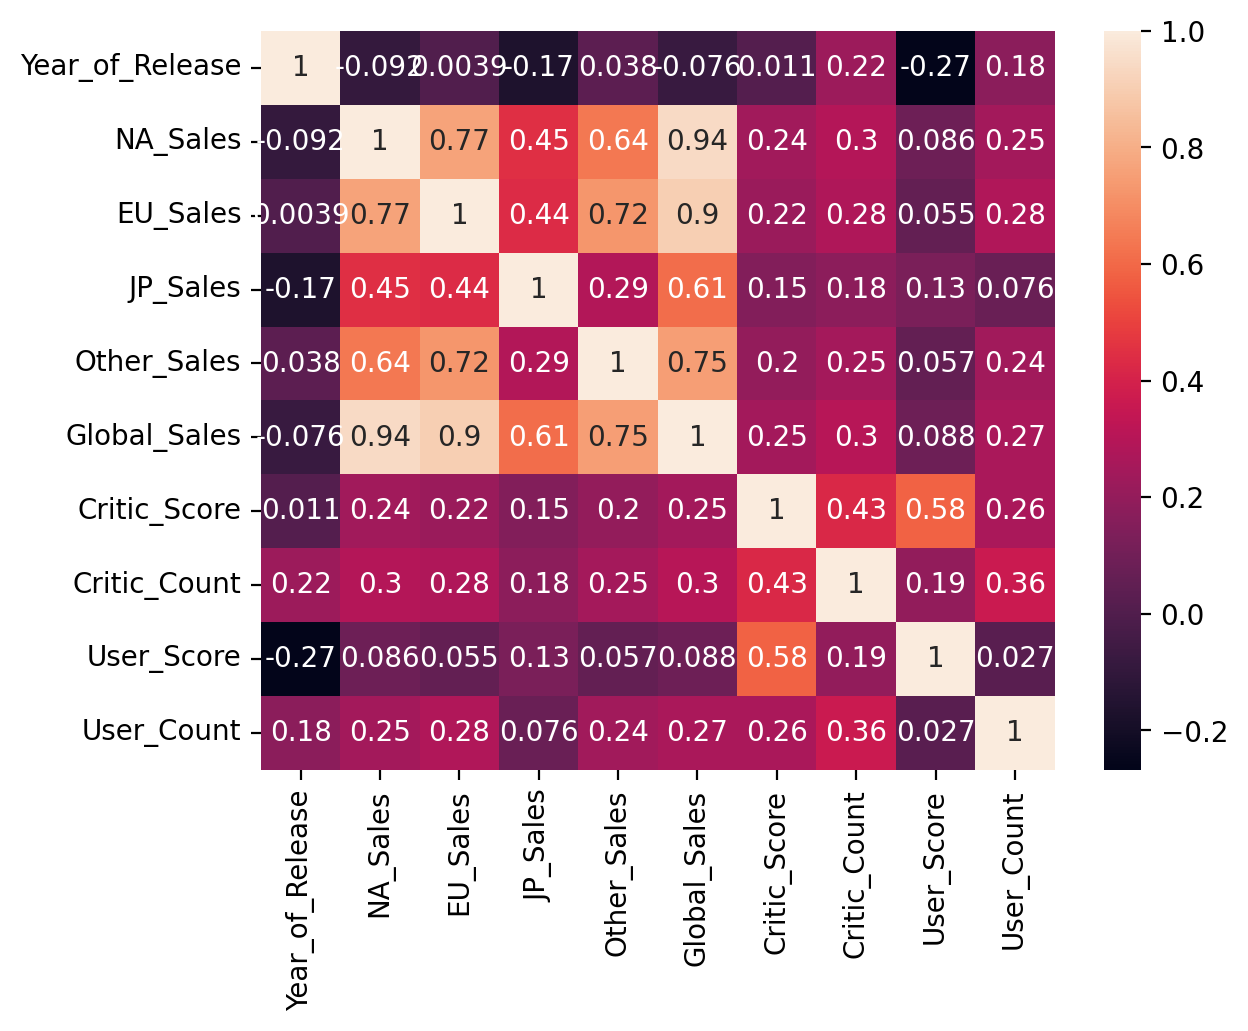

In [14]:
# heat map to check if there's any correlation btw missing data and other variables
plt.figure(dpi=200)
sns.heatmap(df.select_dtypes(exclude = "object").corr(), annot = True)

In [15]:
# drop the highest % of missing values -> User_Score
df.drop(df[df["User_Score"].isna()].index, inplace=True)

In [16]:
# percentage of missing values again
df_total = len(df)

for col, null_sum in df.isna().sum().items():
    print(f"{col}: {null_sum} - {((null_sum/df_total) * 100):.2f}%")

Name: 0 - 0.00%
Platform: 0 - 0.00%
Year_of_Release: 127 - 1.67%
Genre: 0 - 0.00%
Publisher: 6 - 0.08%
NA_Sales: 0 - 0.00%
EU_Sales: 0 - 0.00%
JP_Sales: 0 - 0.00%
Other_Sales: 0 - 0.00%
Global_Sales: 0 - 0.00%
Critic_Score: 573 - 7.55%
Critic_Count: 573 - 7.55%
User_Score: 0 - 0.00%
User_Count: 0 - 0.00%
Developer: 11 - 0.14%
Rating: 86 - 1.13%


In [17]:
# drop critic score because we can't figure out a pattern in the correlation matrix above
df.drop(df[df["Critic_Score"].isna()].index, inplace=True)

In [18]:
# percentage of missing values again
df_total = len(df)

for col, null_sum in df.isna().sum().items():
    print(f"{col}: {null_sum} - {((null_sum/df_total) * 100):.2f}%")

Name: 0 - 0.00%
Platform: 0 - 0.00%
Year_of_Release: 123 - 1.75%
Genre: 0 - 0.00%
Publisher: 4 - 0.06%
NA_Sales: 0 - 0.00%
EU_Sales: 0 - 0.00%
JP_Sales: 0 - 0.00%
Other_Sales: 0 - 0.00%
Global_Sales: 0 - 0.00%
Critic_Score: 0 - 0.00%
Critic_Count: 0 - 0.00%
User_Score: 0 - 0.00%
User_Count: 0 - 0.00%
Developer: 4 - 0.06%
Rating: 70 - 1.00%


In [19]:
# drop missing rating
df.drop(df[df["Rating"].isna()].index, inplace=True)

In [20]:
# percentage of missing values again
df_total = len(df)

for col, null_sum in df.isna().sum().items():
    print(f"{col}: {null_sum} - {((null_sum/df_total) * 100):.2f}%")

Name: 0 - 0.00%
Platform: 0 - 0.00%
Year_of_Release: 121 - 1.74%
Genre: 0 - 0.00%
Publisher: 4 - 0.06%
NA_Sales: 0 - 0.00%
EU_Sales: 0 - 0.00%
JP_Sales: 0 - 0.00%
Other_Sales: 0 - 0.00%
Global_Sales: 0 - 0.00%
Critic_Score: 0 - 0.00%
Critic_Count: 0 - 0.00%
User_Score: 0 - 0.00%
User_Count: 0 - 0.00%
Developer: 0 - 0.00%
Rating: 0 - 0.00%


In [21]:
# check if we can infere publishers, otherwise remove
df[df["Publisher"].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4127,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.0,0.00,0.48,43.0,17.0,4.1,176.0,Sonic Team,E10+
7333,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.0,0.03,0.21,56.0,15.0,8.5,18.0,Digital Fiction,T
8494,Stronghold 3,PC,2011.0,Strategy,NaN,0.06,0.10,0.0,0.00,0.16,47.0,29.0,3.0,350.0,FireFly Studios,T
16280,Homeworld Remastered Collection,PC,NaN,Strategy,NaN,0.00,0.01,0.0,0.00,0.01,86.0,49.0,8.2,324.0,Gearbox Software,E10+


In [22]:
df[(df["Developer"] == "Sonic Team")]["Publisher"].value_counts() #mode = Sega

df[(df["Developer"] == "Digital Fiction")] # delete this, just one record with same developer

df[(df["Developer"] == "FireFly Studios")] # delete this too, only 4 & they've worked with 4 diff publishers

df[(df["Developer"] == "Gearbox Software")] # delete this too

# final verdict, delete all

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
386,Borderlands,X360,2009.0,Shooter,Take-Two Interactive,2.40,0.71,0.03,0.29,3.44,84.0,83.0,8.2,715.0,Gearbox Software,M
459,Borderlands 2,X360,2012.0,Shooter,Take-Two Interactive,1.89,0.88,0.04,0.25,3.05,89.0,59.0,8.2,892.0,Gearbox Software,M
727,Borderlands 2,PS3,2012.0,Shooter,Take-Two Interactive,1.05,0.72,0.10,0.35,2.23,91.0,25.0,8.2,858.0,Gearbox Software,M
792,Borderlands,PS3,2009.0,Shooter,Take-Two Interactive,1.20,0.60,0.00,0.29,2.09,83.0,58.0,7.9,427.0,Gearbox Software,M
2235,Brothers in Arms: Hell's Highway,PS3,2008.0,Shooter,Ubisoft,0.44,0.34,0.00,0.15,0.93,76.0,48.0,8.0,70.0,Gearbox Software,M
2238,Borderlands 2,PC,2012.0,Shooter,Take-Two Interactive,0.42,0.41,0.00,0.10,0.93,89.0,38.0,8.2,2482.0,Gearbox Software,M
2353,Samba De Amigo,Wii,2008.0,Misc,Sega,0.41,0.37,0.01,0.09,0.88,68.0,43.0,8.1,40.0,Gearbox Software,E
2375,Borderlands: The Handsome Collection,PS4,2015.0,Shooter,Take-Two Interactive,0.38,0.33,0.03,0.14,0.88,82.0,49.0,7.8,345.0,Gearbox Software,M
2405,Brothers in Arms: Hell's Highway,X360,2008.0,Shooter,Ubisoft,0.47,0.30,0.00,0.09,0.87,76.0,65.0,8.3,149.0,Gearbox Software,M
2641,Aliens: Colonial Marines,X360,2013.0,Shooter,Sega,0.36,0.34,0.00,0.07,0.77,48.0,47.0,3.8,449.0,Gearbox Software,M


In [23]:
# we need to drop unknowns to prevent bias
df.drop(df[df["Publisher"].isna()].index, inplace=True)

In [24]:
# percentage of missing values again
df_total = len(df)

for col, null_sum in df.isna().sum().items():
    print(f"{col}: {null_sum} - {((null_sum/df_total) * 100):.2f}%")

Name: 0 - 0.00%
Platform: 0 - 0.00%
Year_of_Release: 118 - 1.70%
Genre: 0 - 0.00%
Publisher: 0 - 0.00%
NA_Sales: 0 - 0.00%
EU_Sales: 0 - 0.00%
JP_Sales: 0 - 0.00%
Other_Sales: 0 - 0.00%
Global_Sales: 0 - 0.00%
Critic_Score: 0 - 0.00%
Critic_Count: 0 - 0.00%
User_Score: 0 - 0.00%
User_Count: 0 - 0.00%
Developer: 0 - 0.00%
Rating: 0 - 0.00%


### Investigate year of release

In [25]:
df["Year_of_Release"].nunique() # 25

df["Year_of_Release"].value_counts() #2008.0, 2007.0, 2005.0 are very close -> plot sef

# remvoe na
df.drop(df[df["Year_of_Release"].isna()].index, inplace=True)

In [26]:
# percentage of missing values again
df_total = len(df)

for col, null_sum in df.isna().sum().items():
    print(f"{col}: {null_sum} - {((null_sum/df_total) * 100):.2f}%")

Name: 0 - 0.00%
Platform: 0 - 0.00%
Year_of_Release: 0 - 0.00%
Genre: 0 - 0.00%
Publisher: 0 - 0.00%
NA_Sales: 0 - 0.00%
EU_Sales: 0 - 0.00%
JP_Sales: 0 - 0.00%
Other_Sales: 0 - 0.00%
Global_Sales: 0 - 0.00%
Critic_Score: 0 - 0.00%
Critic_Count: 0 - 0.00%
User_Score: 0 - 0.00%
User_Count: 0 - 0.00%
Developer: 0 - 0.00%
Rating: 0 - 0.00%


In [27]:
df_total

6825

<Axes: >

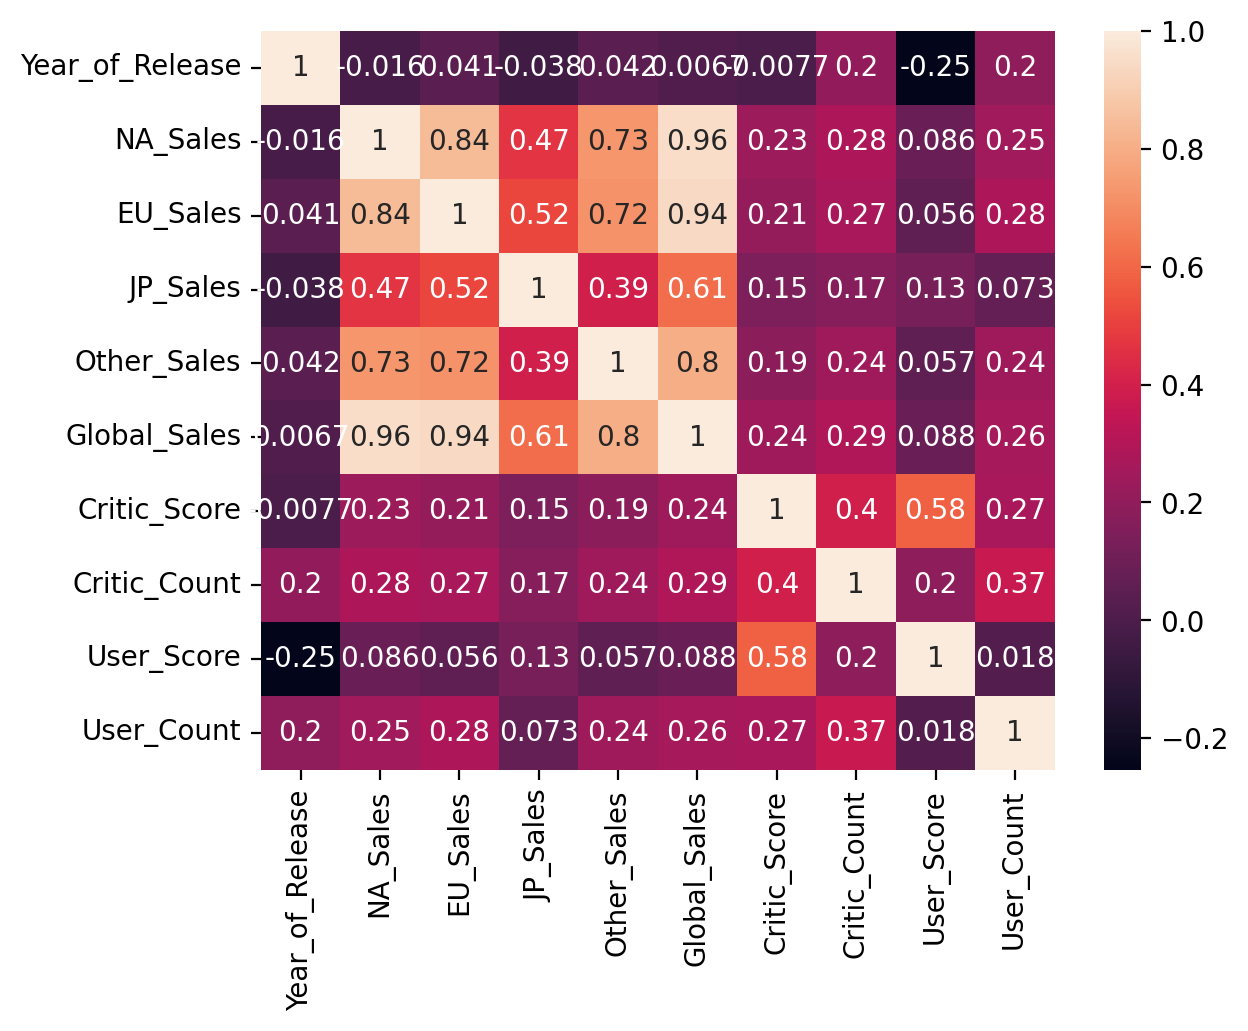

In [28]:
# final heat map to show correlation btw variables
plt.figure(dpi=200)
sns.heatmap(df.select_dtypes(exclude = "object").corr(), annot = True)

In [29]:
df.info() # update types of Year_of_Release, Critic_Count and User_Count

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


In [30]:
#check uniqueb year of release vals
df["Year_of_Release"].unique()
 # convert to categorical
df["Year_of_Release"] = df["Year_of_Release"].astype(int).astype(str)
#check unique vals again
df["Year_of_Release"].unique() 

#check critic count vals
df["Critic_Count"].unique() 
df["Critic_Count"] = df["Critic_Count"].astype(int)
df["Critic_Count"].unique() #check unique vals again

#check user count vals
df["User_Count"].unique()
# investigate user_count precision
df[df["User_Count"] != round(df["User_Count"], 2)]
# convert user_count to int
df["User_Count"] = df["User_Count"].astype(int)
#check unique vals again
df["User_Count"].unique() 

array([  322,   709,   192,   431,   129,   594,   464,   146,   106,
          52,  3994,  1588,    50,  3711,   730,    19,   314,  8713,
        1454,   922,  2256,  2698,  5234,   664,  1662,   632,  1094,
        2899,   242,  4100,   272,  2147,  2951,   138,   921,  1112,
        2073,  2833,  2117,    16,   424,  2045,  1282,  3260,   135,
          24,  1047,  1320,   626,    85,  3589,   896,  1218,    54,
         190,   348,  1056,   886,   644,   203,   451,  1443,   398,
        1854,   580,  2142,   171,   110,  1761,  4228,   367,  1658,
         432,  1599,   568,   132,    28,  2739,  3712,   993,  5187,
          27,  2456,   576,  1307,   368,  1283,  2527,   222,   597,
        1163,  2316,   439,  2182,    78,  1504,    95,  2295,   988,
        1026,   918,  3558,   972,  8003,  5311,   364,   197,   102,
        5380,    62,    21,  1202,  1074,   516,    41,   124,  2162,
         764,   108,   156,   409,  7064,  2483,   779,  1196,   400,
         898,  1305,

<Figure size 768x576 with 0 Axes>

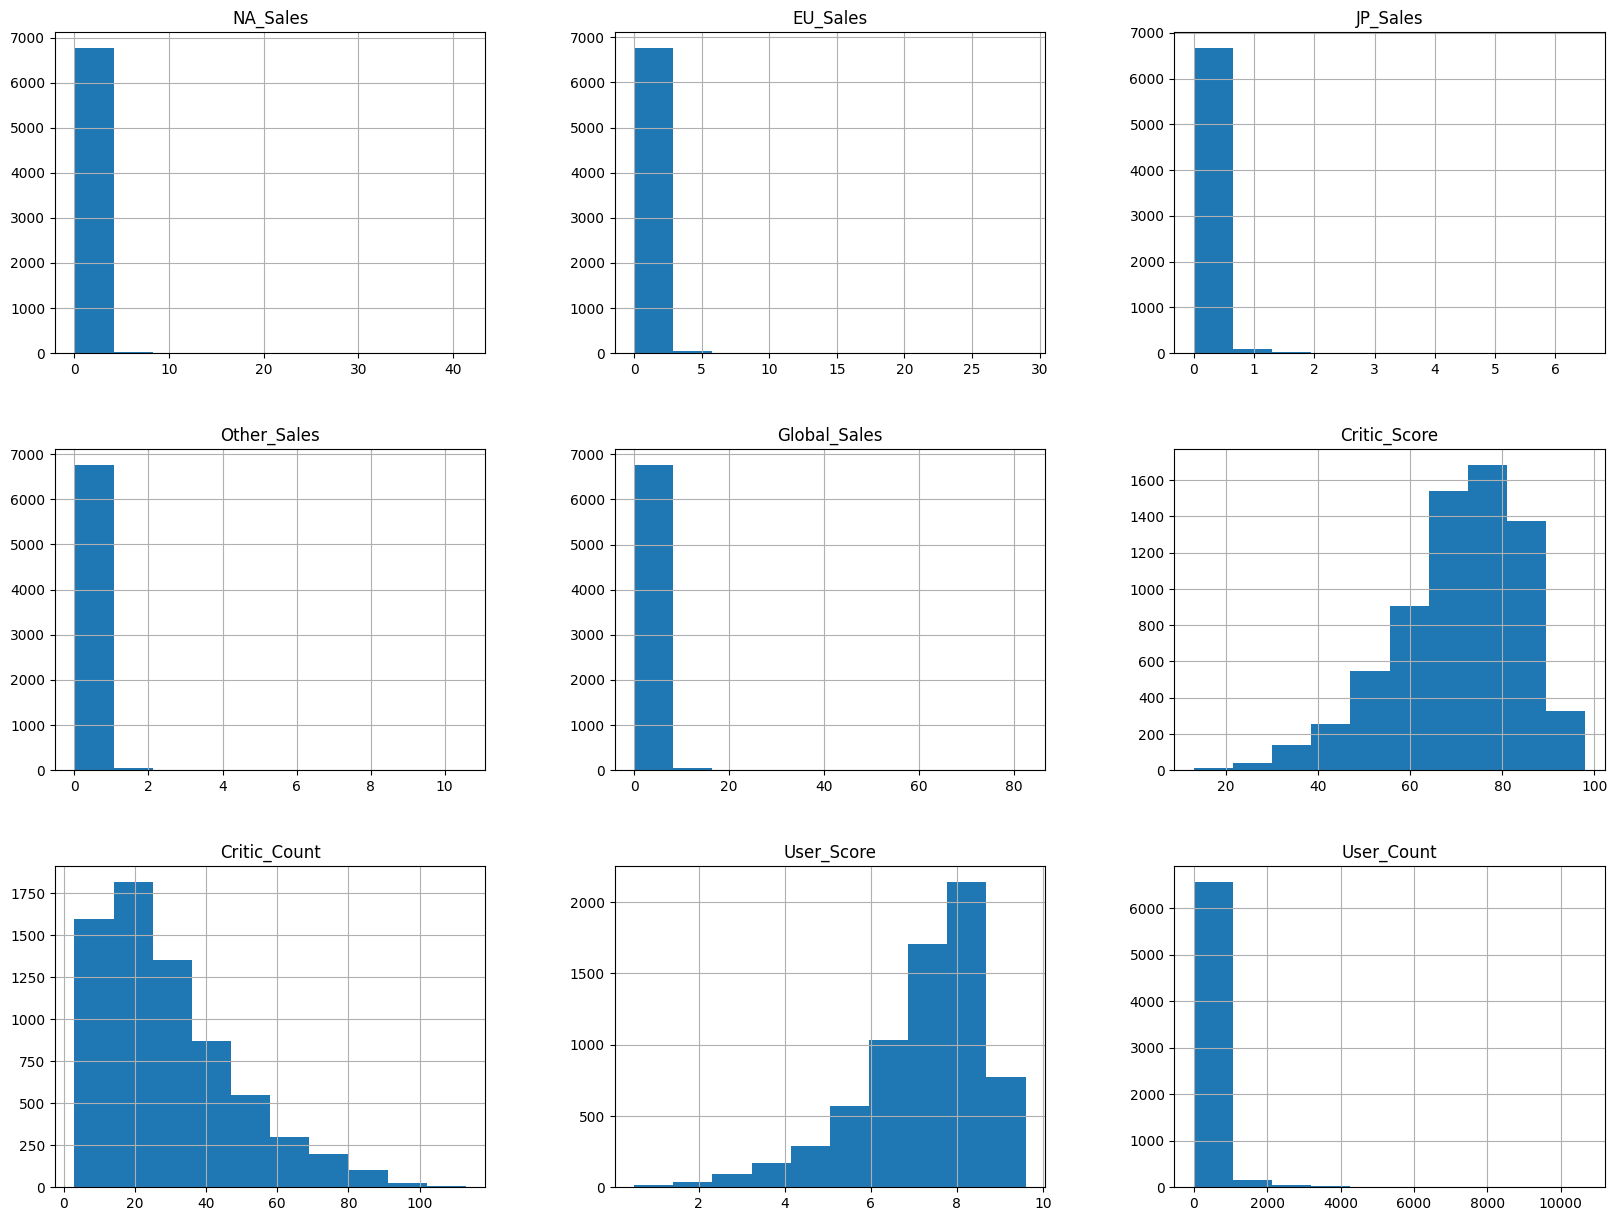

In [31]:
# histplot to show distribution of all numeric variables
plt.figure(dpi=120)
df.hist(figsize=(20, 15))
plt.show()

In [32]:
# descriptive staticstics of all numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NA_Sales,6825.0,0.394484,0.967385,0.00,0.06,0.15,0.39,41.36
EU_Sales,6825.0,0.236089,0.687330,0.00,0.02,0.06,0.21,28.96
JP_Sales,6825.0,0.064158,0.287570,0.00,0.00,0.00,0.01,6.50
Other_Sales,6825.0,0.082677,0.269871,0.00,0.01,0.02,0.07,10.57
Global_Sales,6825.0,0.777590,1.963443,0.01,0.11,0.29,0.75,82.53
Critic_Score,6825.0,70.272088,13.868572,13.00,62.00,72.00,80.00,98.00
Critic_Count,6825.0,28.931136,19.224165,3.00,14.00,25.00,39.00,113.00
User_Score,6825.0,7.185626,1.439942,0.50,6.50,7.50,8.20,9.60
User_Count,6825.0,174.722344,587.428538,4.00,11.00,27.00,89.00,10665.00


In [33]:
# print number of unique vals per object col
for column_name, dtype in df.dtypes.to_dict().items():
    if dtype == "object":
        print(f"unique values for {column_name}: {df[column_name].nunique()}")

unique values for Name: 4377
unique values for Platform: 17
unique values for Year_of_Release: 25
unique values for Genre: 12
unique values for Publisher: 262
unique values for Developer: 1289
unique values for Rating: 7


In [34]:
# check for duplicates
df.duplicated().sum()

0

In [35]:
# print number of unique vals per object col again
for column_name, dtype in df.dtypes.to_dict().items():
    if dtype == "object":
        print(f"unique values for {column_name}: {df[column_name].nunique()}")

unique values for Name: 4377
unique values for Platform: 17
unique values for Year_of_Release: 25
unique values for Genre: 12
unique values for Publisher: 262
unique values for Developer: 1289
unique values for Rating: 7


In [36]:
# group entries with less common ratings into a single category called "Other ratings".
# needed to prevent errors with SMOTE
rating_counts = df["Rating"].value_counts()
df["Rating"] = df["Rating"].apply(lambda x: "Other ratings" if rating_counts[x] < 2 else x)
df["Rating"].value_counts()

Rating
T                2377
E                2082
M                1433
E10+              930
Other ratings       3
Name: count, dtype: int64

In [37]:
# print number of unique vals per object col again
for column_name, dtype in df.dtypes.to_dict().items():
    if dtype == "object":
        print(f"unique values for {column_name}: {df[column_name].nunique()}")

unique values for Name: 4377
unique values for Platform: 17
unique values for Year_of_Release: 25
unique values for Genre: 12
unique values for Publisher: 262
unique values for Developer: 1289
unique values for Rating: 5


In [38]:
# reset indices
df.reset_index(drop=True, inplace=True)

In [39]:
# extract numerical columns into new dataset
df_numeric = df.select_dtypes(exclude="object")
df_numeric

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322
1,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709
2,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192
3,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431
4,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129
...,...,...,...,...,...,...,...,...,...
6820,0.01,0.00,0.00,0.00,0.01,46.0,4,2.4,21
6821,0.01,0.00,0.00,0.00,0.01,81.0,12,8.8,9
6822,0.00,0.01,0.00,0.00,0.01,80.0,20,7.6,412
6823,0.01,0.00,0.00,0.00,0.01,61.0,12,5.8,43


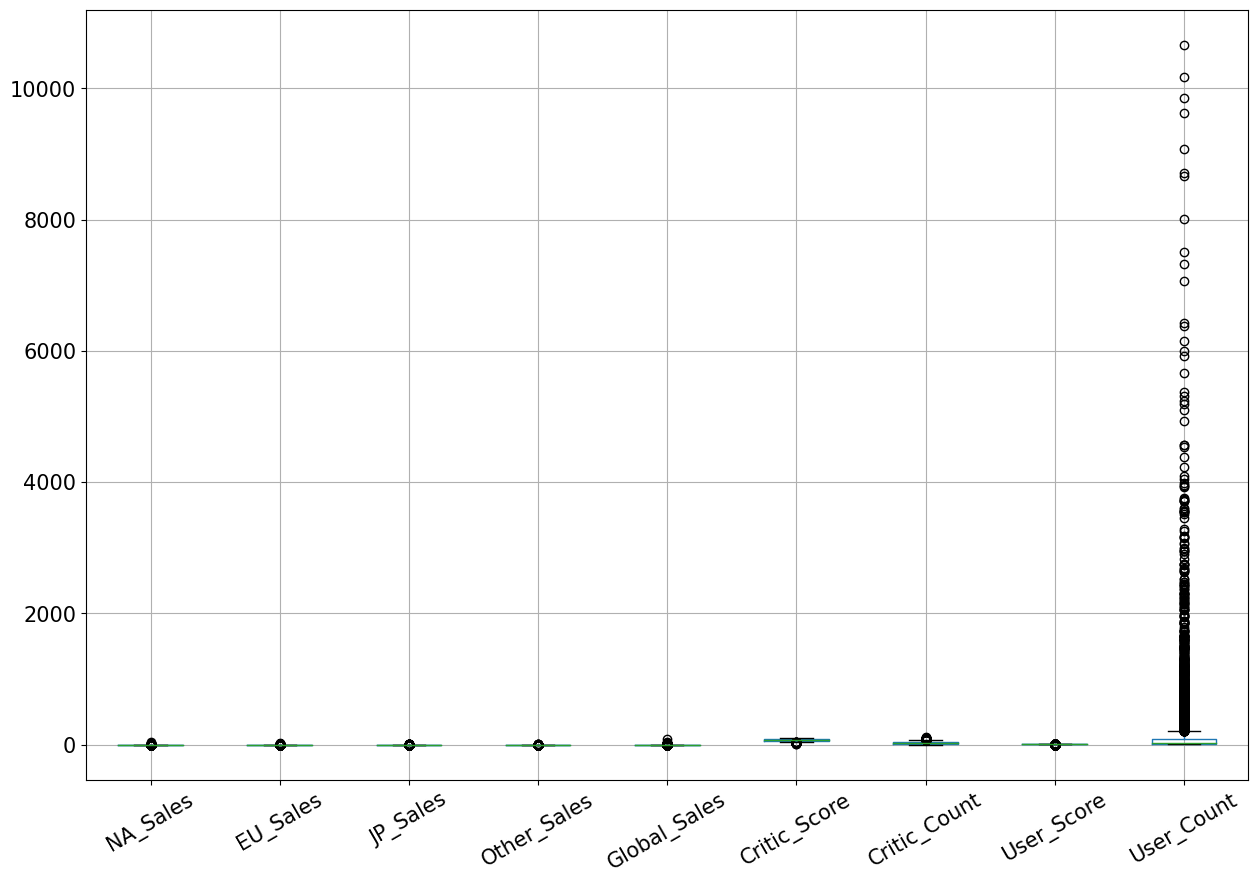

In [40]:
# plot the boxplot (see if we need to rescale our data)
df_numeric.boxplot(figsize = (15,10), fontsize = 15, rot = 30) 
plt.show()

In [41]:
# extract categorical columns into new dataset
df_object = df.select_dtypes(include="object")
df_object

,Name,Platform,Year_of_Release,Genre,Publisher,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,Nintendo,E
...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,Kojima Productions,M
6823,Breach,PC,2011,Shooter,Destineer,Atomic Games,T


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   object 
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 853.2+ KB


In [43]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4,2.4,21,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12,8.8,9,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20,7.6,412,Kojima Productions,M
6823,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12,5.8,43,Atomic Games,T


## 1. Which of the variables or a combination of them best predict “global sales” of video games?

### Helper functions for regression tests

In [44]:
independent_num_var_list = df_numeric.drop("Global_Sales", axis=1).columns.to_list()

def run_simple_linear_regression(independent_var, regressor = LinearRegression(), dependent_var = "Global_Sales"):
    # Split data into input and output variables
    x = df_numeric.drop([dependent_var], axis=1)
    y = df_numeric[dependent_var]
    
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    #scaling the dataset
    scale = StandardScaler()
    scale.fit(x_train)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    
    #converting to pandas dataframe
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
    
    # Reshaping the attribute
    x_train_scaled_reshaped = x_train_scaled[independent_var].to_numpy().reshape(-1,1)
    x_test_scaled_reshaped = x_test_scaled[independent_var].to_numpy().reshape(-1,1)
    
    # fitting the model to a dataset using the regressor
    model = regressor
    
    # Train the model using the training sets
    model.fit(x_train_scaled_reshaped, y_train)
    
    # Make predictions with the testing dataset
    prediction = model.predict(x_test_scaled_reshaped)
    
    # The mean absolute error
    mean_abs = mean_absolute_error(y_test, prediction)
    # The mean squared error
    mean_squared = mean_squared_error(y_test, prediction)
    
    print("--" * 20)
    print(f"{independent_var} Results")
    print("--" * 20)
    print(f"mean absolute error: {mean_abs:.5f}")
    print(f"mean squared error: {mean_squared:.5f}")
    print(f"root mean squared error: {np.sqrt(mean_squared):.5f}")
    print(f"coefficient of determination: {r2_score(y_test, prediction):.5f}")


In [45]:
def run_multi_linear_regression(independent_vars, regressor = LinearRegression(), dependent_var = "Global_Sales"):    
    # Split data into input and output variables
    if isinstance(dependent_var, str):
        x = df_numeric.drop([dependent_var], axis=1)
    elif isinstance(dependent_var, list):
        x = df_numeric.drop(dependent_var, axis=1)
        
    y = df_numeric[dependent_var]
    
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    #scaling the dataset
    scale = StandardScaler()
    scale.fit(x_train)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    
    #converting to pandas dataframe
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)[independent_vars]
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)[independent_vars]
    
    # fitting the model to a dataset using the LinearRegres
    model = regressor
    
    # Train the model using the training sets
    model.fit(x_train_scaled, y_train)
    
    # Make predictions with the testing dataset
    prediction = model.predict(x_test_scaled)
    
    # The mean absolute error
    mean_abs = mean_absolute_error(y_test, prediction)
    # The mean squared error
    mean_squared = mean_squared_error(y_test, prediction)
    
    joined_vars = ", ".join(independent_vars)
    
    print("--" * 20)
    print(f"{joined_vars} Results")
    print("--" * 20)
    print(f"mean absolute error: {mean_abs:.5f}")
    print(f"mean squared error: {mean_squared:.5f}")
    print(f"root mean squared error: {np.sqrt(mean_squared):.5f}")
    print(f"coefficient of determination: {r2_score(y_test, prediction):.5f}")

### SLR for all independent variables on global sales

In [46]:
for independent_var in independent_num_var_list:
    run_simple_linear_regression(independent_var)

----------------------------------------
NA_Sales Results
----------------------------------------
mean absolute error: 0.24989
mean squared error: 0.36950
root mean squared error: 0.60786
coefficient of determination: 0.86404
----------------------------------------
EU_Sales Results
----------------------------------------
mean absolute error: 0.30619
mean squared error: 0.41312
root mean squared error: 0.64275
coefficient of determination: 0.84799
----------------------------------------
JP_Sales Results
----------------------------------------
mean absolute error: 0.69309
mean squared error: 2.10164
root mean squared error: 1.44970
coefficient of determination: 0.22667
----------------------------------------
Other_Sales Results
----------------------------------------
mean absolute error: 0.38373
mean squared error: 0.81625
root mean squared error: 0.90346
coefficient of determination: 0.69965
----------------------------------------
Critic_Score Results
---------------------------

### All distinct combinations of 2 independent variables for MLR on global sales

In [47]:
list_of_2_vars = list(itertools.combinations(independent_num_var_list, 2))

for independent_vars in list_of_2_vars:
    run_multi_linear_regression(list(independent_vars))

----------------------------------------
NA_Sales, EU_Sales Results
----------------------------------------
mean absolute error: 0.09901
mean squared error: 0.05880
root mean squared error: 0.24250
coefficient of determination: 0.97836
----------------------------------------
NA_Sales, JP_Sales Results
----------------------------------------
mean absolute error: 0.20345
mean squared error: 0.22342
root mean squared error: 0.47268
coefficient of determination: 0.91779
----------------------------------------
NA_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.19100
mean squared error: 0.22947
root mean squared error: 0.47903
coefficient of determination: 0.91557
----------------------------------------
NA_Sales, Critic_Score Results
----------------------------------------
mean absolute error: 0.24973
mean squared error: 0.36761
root mean squared error: 0.60631
coefficient of determination: 0.86473
----------------------------------------
NA_S

### All distinct combinations of 4 independent variables for MLR on global sales

In [48]:
list_of_4_vars = list(itertools.combinations(independent_num_var_list, 4))

for independent_vars in list_of_4_vars:
    run_multi_linear_regression(list(independent_vars))

----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.00377
mean squared error: 0.00004
root mean squared error: 0.00605
coefficient of determination: 0.99999
----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Critic_Score Results
----------------------------------------
mean absolute error: 0.04217
mean squared error: 0.01411
root mean squared error: 0.11877
coefficient of determination: 0.99481
----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Critic_Count Results
----------------------------------------
mean absolute error: 0.04190
mean squared error: 0.01411
root mean squared error: 0.11880
coefficient of determination: 0.99481
----------------------------------------
NA_Sales, EU_Sales, JP_Sales, User_Score Results
----------------------------------------
mean absolute error: 0.04181
mean squared error: 0.01413
root mean squared error: 0.118

----------------------------------------
NA_Sales, Critic_Score, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.24506
mean squared error: 0.36614
root mean squared error: 0.60510
coefficient of determination: 0.86527
----------------------------------------
NA_Sales, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.24516
mean squared error: 0.36601
root mean squared error: 0.60499
coefficient of determination: 0.86532
----------------------------------------
EU_Sales, JP_Sales, Other_Sales, Critic_Score Results
----------------------------------------
mean absolute error: 0.23984
mean squared error: 0.30189
root mean squared error: 0.54945
coefficient of determination: 0.88891
----------------------------------------
EU_Sales, JP_Sales, Other_Sales, Critic_Count Results
----------------------------------------
mean absolute error: 0.23897
mean squared error: 0.29953
root mean squ

----------------------------------------
Other_Sales, Critic_Score, Critic_Count, User_Count Results
----------------------------------------
mean absolute error: 0.37340
mean squared error: 0.75779
root mean squared error: 0.87051
coefficient of determination: 0.72116
----------------------------------------
Other_Sales, Critic_Score, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.37215
mean squared error: 0.76555
root mean squared error: 0.87496
coefficient of determination: 0.71831
----------------------------------------
Other_Sales, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.37275
mean squared error: 0.76530
root mean squared error: 0.87481
coefficient of determination: 0.71840
----------------------------------------
Critic_Score, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.71995
mean squared error: 2.14

### Gradient boosting regressor for all independent variables on global sales

In [49]:
regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
for independent_var in independent_num_var_list:
    run_simple_linear_regression(independent_var, regressor=regressor)

----------------------------------------
NA_Sales Results
----------------------------------------
mean absolute error: 0.27152
mean squared error: 0.53055
root mean squared error: 0.72839
coefficient of determination: 0.80478
----------------------------------------
EU_Sales Results
----------------------------------------
mean absolute error: 0.32242
mean squared error: 0.50062
root mean squared error: 0.70754
coefficient of determination: 0.81579
----------------------------------------
JP_Sales Results
----------------------------------------
mean absolute error: 0.67417
mean squared error: 2.08434
root mean squared error: 1.44372
coefficient of determination: 0.23304
----------------------------------------
Other_Sales Results
----------------------------------------
mean absolute error: 0.34592
mean squared error: 1.02373
root mean squared error: 1.01180
coefficient of determination: 0.62330
----------------------------------------
Critic_Score Results
---------------------------

### Gradient boosting regressor for strongly correlated independent variables on global sales

In [50]:
strongly_correlated_vars = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
run_multi_linear_regression(strongly_correlated_vars, regressor=regressor)

----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.04823
mean squared error: 0.04378
root mean squared error: 0.20925
coefficient of determination: 0.98389


### Lasso regressor for all independent variables on global sales

In [51]:
regressor = Lasso(alpha=0.1)
for independent_var in independent_num_var_list:
    run_simple_linear_regression(independent_var, regressor=regressor)

----------------------------------------
NA_Sales Results
----------------------------------------
mean absolute error: 0.24568
mean squared error: 0.34295
root mean squared error: 0.58562
coefficient of determination: 0.87381
----------------------------------------
EU_Sales Results
----------------------------------------
mean absolute error: 0.31330
mean squared error: 0.40937
root mean squared error: 0.63982
coefficient of determination: 0.84937
----------------------------------------
JP_Sales Results
----------------------------------------
mean absolute error: 0.69299
mean squared error: 2.07980
root mean squared error: 1.44215
coefficient of determination: 0.23471
----------------------------------------
Other_Sales Results
----------------------------------------
mean absolute error: 0.40338
mean squared error: 0.85691
root mean squared error: 0.92569
coefficient of determination: 0.68469
----------------------------------------
Critic_Score Results
---------------------------

### Lasso regressor for strongly correlated independent variables on global sales

In [52]:
regressor = Lasso(alpha=0.1)
run_multi_linear_regression(strongly_correlated_vars, regressor=regressor)

----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.04420
mean squared error: 0.00802
root mean squared error: 0.08955
coefficient of determination: 0.99705


### Support vector regressor for strongly correlated independent variables on global sales

In [53]:
regressor = SVR(kernel='linear')
run_multi_linear_regression(strongly_correlated_vars, regressor=regressor)

----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.00716
mean squared error: 0.00012
root mean squared error: 0.01104
coefficient of determination: 0.99996


### KNN regressor for strongly correlated independent variables on global sales

In [54]:
regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')
run_multi_linear_regression(strongly_correlated_vars, regressor=regressor)

----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.04419
mean squared error: 0.07001
root mean squared error: 0.26459
coefficient of determination: 0.97424


### Random forest regressor for strongly correlated independent variables on global sales

In [55]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
run_multi_linear_regression(strongly_correlated_vars, regressor=regressor)

----------------------------------------
NA_Sales, EU_Sales, JP_Sales, Other_Sales Results
----------------------------------------
mean absolute error: 0.04019
mean squared error: 0.04024
root mean squared error: 0.20059
coefficient of determination: 0.98519


## 2. What effect will the number of critics and users as well as their review scores have on sales in NA, EU and Japan?

### Multi linear regressor for independent variables on NA sales

In [56]:
independent_variables = ["Critic_Score", "Critic_Count", "User_Score", "User_Count"]
run_multi_linear_regression(independent_variables, dependent_var="NA_Sales")

----------------------------------------
Critic_Score, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.38471
mean squared error: 0.63184
root mean squared error: 0.79488
coefficient of determination: 0.18300


### Multi linear regressor for independent variables on EU sales

In [57]:
run_multi_linear_regression(independent_variables, dependent_var="EU_Sales")

----------------------------------------
Critic_Score, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.24509
mean squared error: 0.27457
root mean squared error: 0.52400
coefficient of determination: 0.20162


### Multi linear regressor for independent variables on JP sales

In [58]:
run_multi_linear_regression(independent_variables, dependent_var="JP_Sales")

----------------------------------------
Critic_Score, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.09303
mean squared error: 0.05148
root mean squared error: 0.22689
coefficient of determination: 0.02707


### Multivariate linear regressor for independent variables on NA, EU & JP sales

In [59]:
# All 3
dependent_variables = ["JP_Sales", "EU_Sales", "NA_Sales"]
run_multi_linear_regression(independent_variables, dependent_var=dependent_variables)

----------------------------------------
Critic_Score, Critic_Count, User_Score, User_Count Results
----------------------------------------
mean absolute error: 0.24095
mean squared error: 0.31930
root mean squared error: 0.56506
coefficient of determination: 0.13723


## 3. Use relevant variables as target variables at each instance and determine which of the variables performed best in classifying the dataset

In [60]:
df_object.nunique().sort_values()

Rating                5
Genre                12
Platform             17
Year_of_Release      25
Publisher           262
Developer          1289
Name               4377
dtype: int64

In [61]:
relevant_cat_variables = ["Rating", "Genre", "Platform"]

### Helper functions for classification tests

In [94]:
def plot_label_distribution(label):
    """
    plot_label_distribution plots the distribution of a given label in the dataframe
    arg: label (str): name of the label column in the dataframe
    """
    fig, ax_position=plt.subplots(1, 2, figsize=(15,6), dpi=200) 
    a = sns.countplot(x=label, data=df, ax=ax_position[0])
    a = df[label].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])
    ax_position[0].tick_params(axis="x", rotation=60)
    

def apply_SMOTE(label):
    sub_df_vars = df_numeric.columns.to_list()
    sub_df_vars = sub_df_vars + [label]
    
    x = df[sub_df_vars].drop(label, axis=1)
    y = df[sub_df_vars][label]
    
    sm = SMOTE(random_state=42, k_neighbors = 2)
    
    # apply SMOTE to resample the dataset
    x_res, y_res = sm.fit_resample(x, y)
    
    # Plot of the dataset
    bal_label = pd.concat([x_res, y_res], axis=1)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    a = sns.countplot(x=label, data=bal_label, ax=ax[0])
    a = bal_label[label].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])
    ax[0].tick_params(axis="x", rotation=60)
    
    return x_res, y_res
    

def use_decision_tree_classifier(label):
    sub_df_vars = df_numeric.columns.to_list()
    sub_df_vars = sub_df_vars + [label]
    sub_df_vars = df[sub_df_vars].copy()
    
    # Convert target variable to numerical using label encoding
    label_encoder = LabelEncoder()
    sub_df_vars[label] = label_encoder.fit_transform(sub_df_vars[label])
    
    return sub_df_vars.drop([label], axis=1), sub_df_vars[label]
    
def run_classification_func(x, y, classifier=LogisticRegression()):
    model = classifier
    
    if isinstance(classifier, DecisionTreeClassifier):
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(classifier, x, y, cv=cv)
        
        # Print mean and standard deviation of scores
        print('Cross-validation scores: ', scores)
        print('Mean score: ', scores.mean())
        print('Standard deviation: ', scores.std())
        
        model.fit(x, y)
        prediction = model.predict(x)
        
        y_test = y
        x_test = x
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()

        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        model.fit(x_train_scaled, y_train)

        prediction = model.predict(x_test_scaled)
    
    print(f"Mislabeled points: {(y_test != prediction).sum()}/{x_test.shape[0]}")
    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    

### Rating

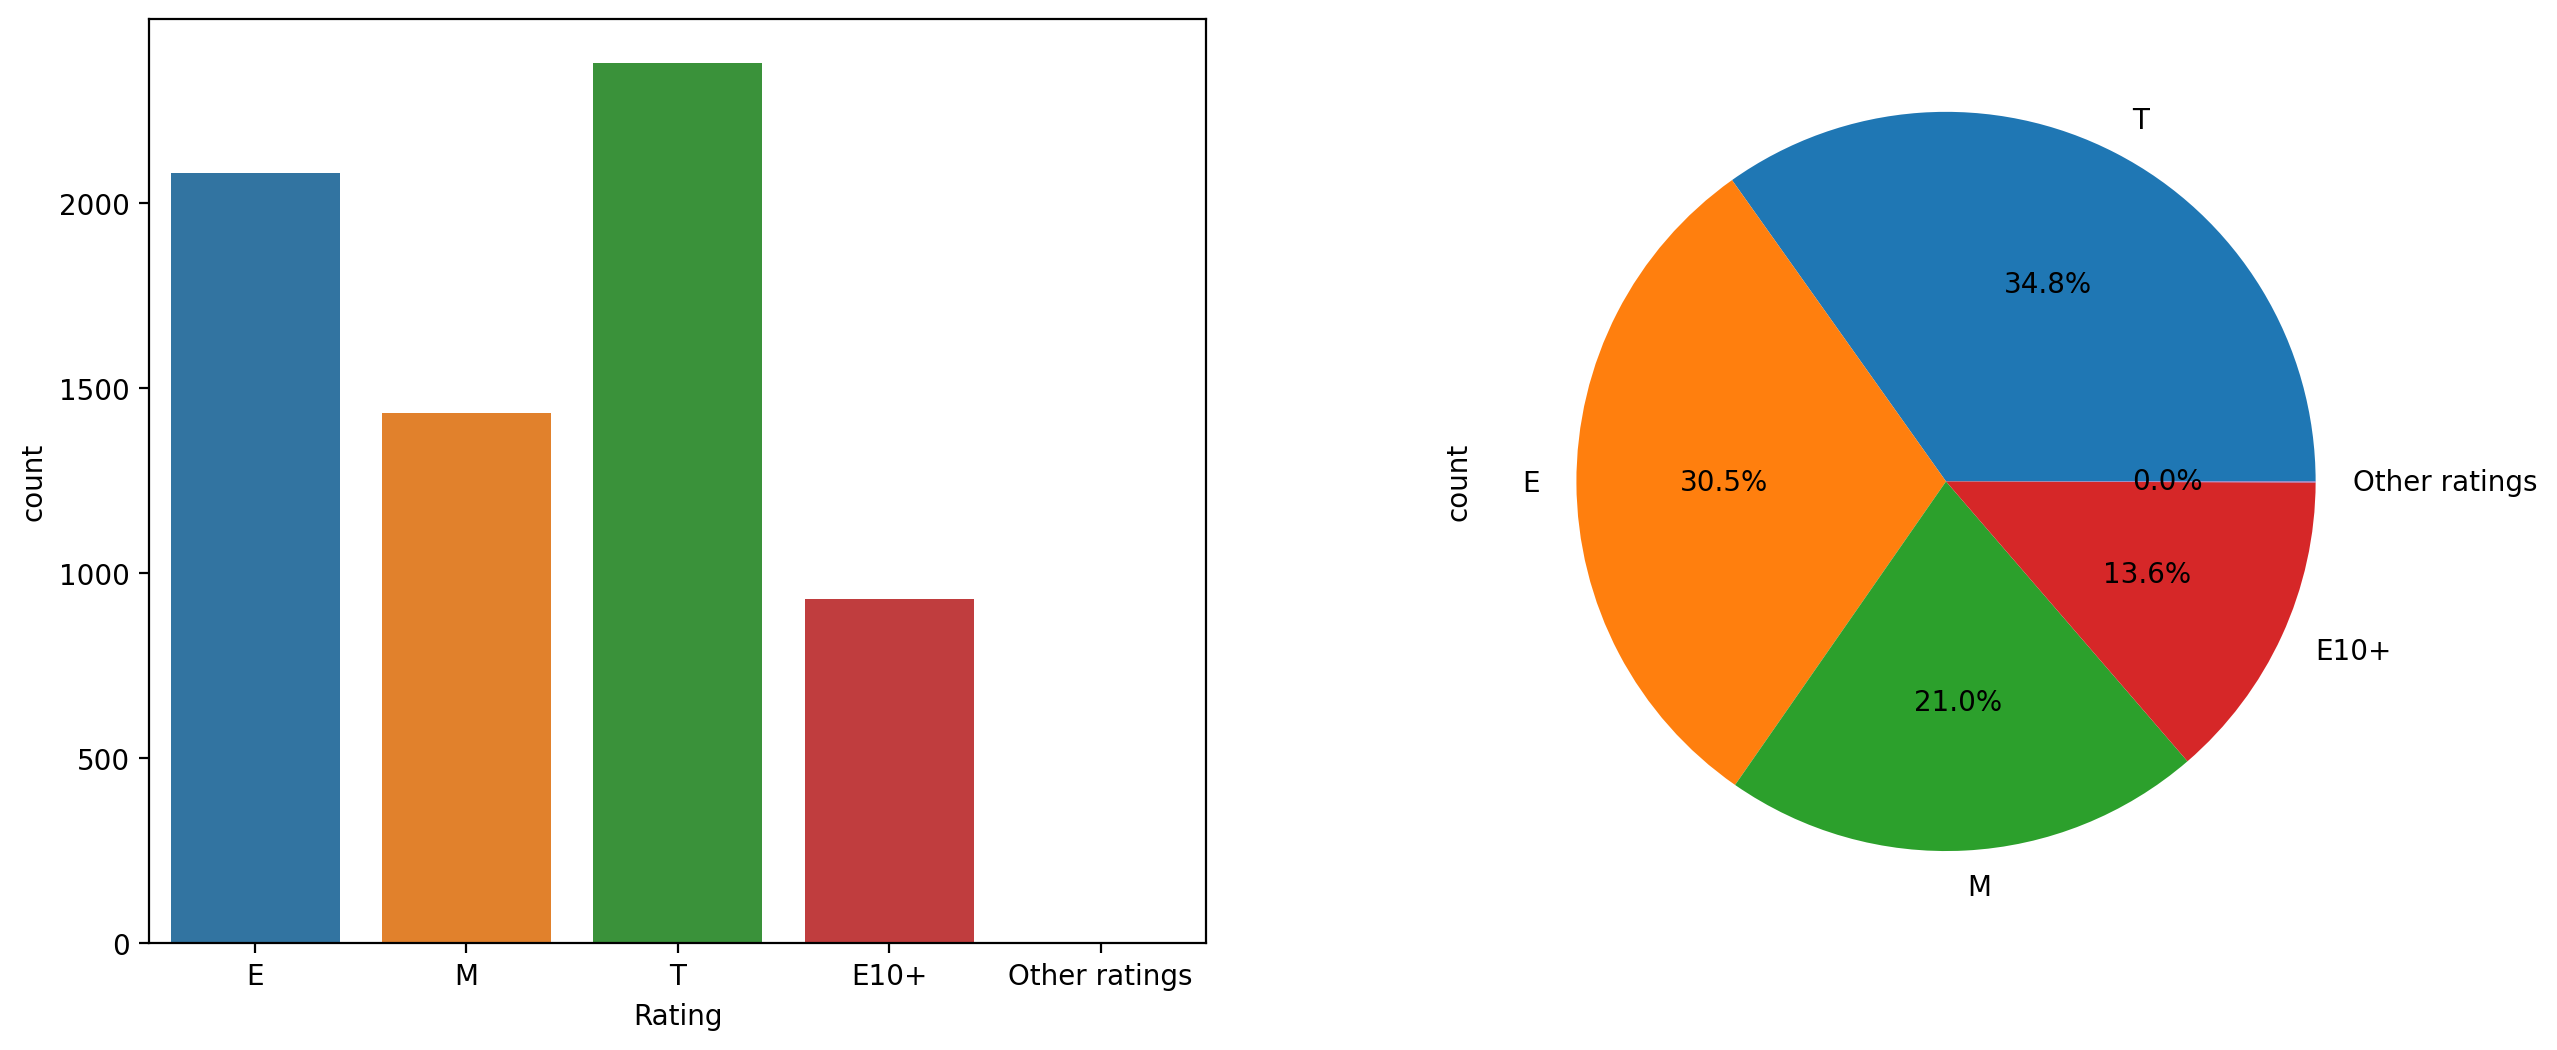

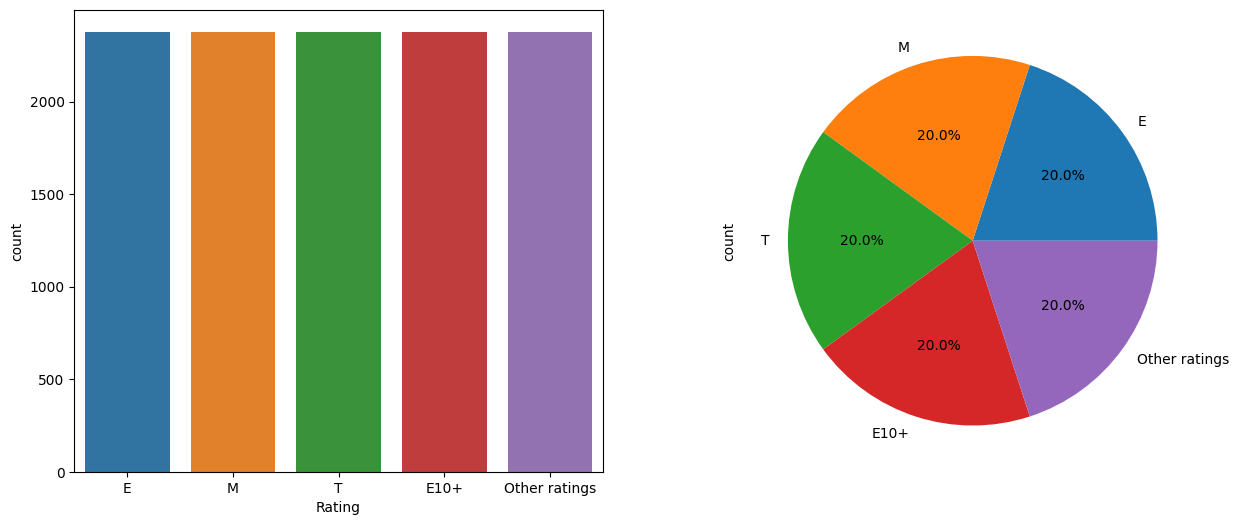

In [63]:
# plot rating distribution and apply SMOTE
plot_label_distribution("Rating")
x_rating, y_rating = apply_SMOTE("Rating")

### Logistic Regression on Rating

In [64]:
run_classification_func(x_rating, y_rating)

Mislabeled points: 1312/2377
               precision    recall  f1-score   support

            E       0.31      0.40      0.35       480
         E10+       0.32      0.24      0.28       503
            M       0.62      0.48      0.54       482
Other ratings       0.70      0.79      0.74       476
            T       0.31      0.33      0.32       436

     accuracy                           0.45      2377
    macro avg       0.45      0.45      0.45      2377
 weighted avg       0.45      0.45      0.45      2377

[[191  97  26  77  89]
 [189 123  50  20 121]
 [ 53  68 229  17 115]
 [ 85  15   0 376   0]
 [100  78  67  45 146]]


### KNN on Rating

In [65]:
run_classification_func(x_rating, y_rating, classifier=KNeighborsClassifier())

Mislabeled points: 981/2377
               precision    recall  f1-score   support

            E       0.46      0.54      0.50       480
         E10+       0.49      0.58      0.53       503
            M       0.60      0.56      0.58       482
Other ratings       0.98      1.00      0.99       476
            T       0.35      0.22      0.27       436

     accuracy                           0.59      2377
    macro avg       0.58      0.58      0.57      2377
 weighted avg       0.58      0.59      0.58      2377

[[261 110  51   0  58]
 [111 290  39   2  61]
 [ 64  87 272   0  59]
 [  0   0   0 476   0]
 [133 109  90   7  97]]


### Naive Bayes on Rating

In [66]:
run_classification_func(x_rating, y_rating, classifier=GaussianNB())

Mislabeled points: 1449/2377
               precision    recall  f1-score   support

            E       0.33      0.07      0.11       480
         E10+       0.28      0.74      0.41       503
            M       0.63      0.20      0.30       482
Other ratings       0.57      0.87      0.69       476
            T       0.19      0.03      0.05       436

     accuracy                           0.39      2377
    macro avg       0.40      0.38      0.31      2377
 weighted avg       0.40      0.39      0.32      2377

[[ 33 324  16  95  12]
 [ 35 372  11  73  12]
 [ 14 286  96  50  36]
 [  0  53  10 413   0]
 [ 18 294  19  91  14]]


### Support Vector Classifier on Rating

In [67]:
run_classification_func(x_rating, y_rating, classifier=SVC())

Mislabeled points: 1048/2377
               precision    recall  f1-score   support

            E       0.53      0.42      0.47       480
         E10+       0.40      0.50      0.45       503
            M       0.63      0.52      0.57       482
Other ratings       0.95      0.95      0.95       476
            T       0.35      0.39      0.37       436

     accuracy                           0.56      2377
    macro avg       0.57      0.56      0.56      2377
 weighted avg       0.57      0.56      0.56      2377

[[201 175  22   3  79]
 [ 72 252  51   4 124]
 [ 28  78 250   5 121]
 [  0  22   0 454   0]
 [ 78 102  73  11 172]]


### Decision Tree on Rating

In [68]:
x_rating, y_rating = use_decision_tree_classifier("Rating")
run_classification_func(x_rating, y_rating, classifier=DecisionTreeClassifier())

Cross-validation scores:  [0.39267399 0.3985348  0.41172161 0.42124542 0.40732601]
Mean score:  0.40630036630036637
Standard deviation:  0.009997785851564526
Mislabeled points: 0/6825
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2082
           1       1.00      1.00      1.00       930
           2       1.00      1.00      1.00      1433
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00      2377

    accuracy                           1.00      6825
   macro avg       1.00      1.00      1.00      6825
weighted avg       1.00      1.00      1.00      6825

[[2082    0    0    0    0]
 [   0  930    0    0    0]
 [   0    0 1433    0    0]
 [   0    0    0    3    0]
 [   0    0    0    0 2377]]


### Genre

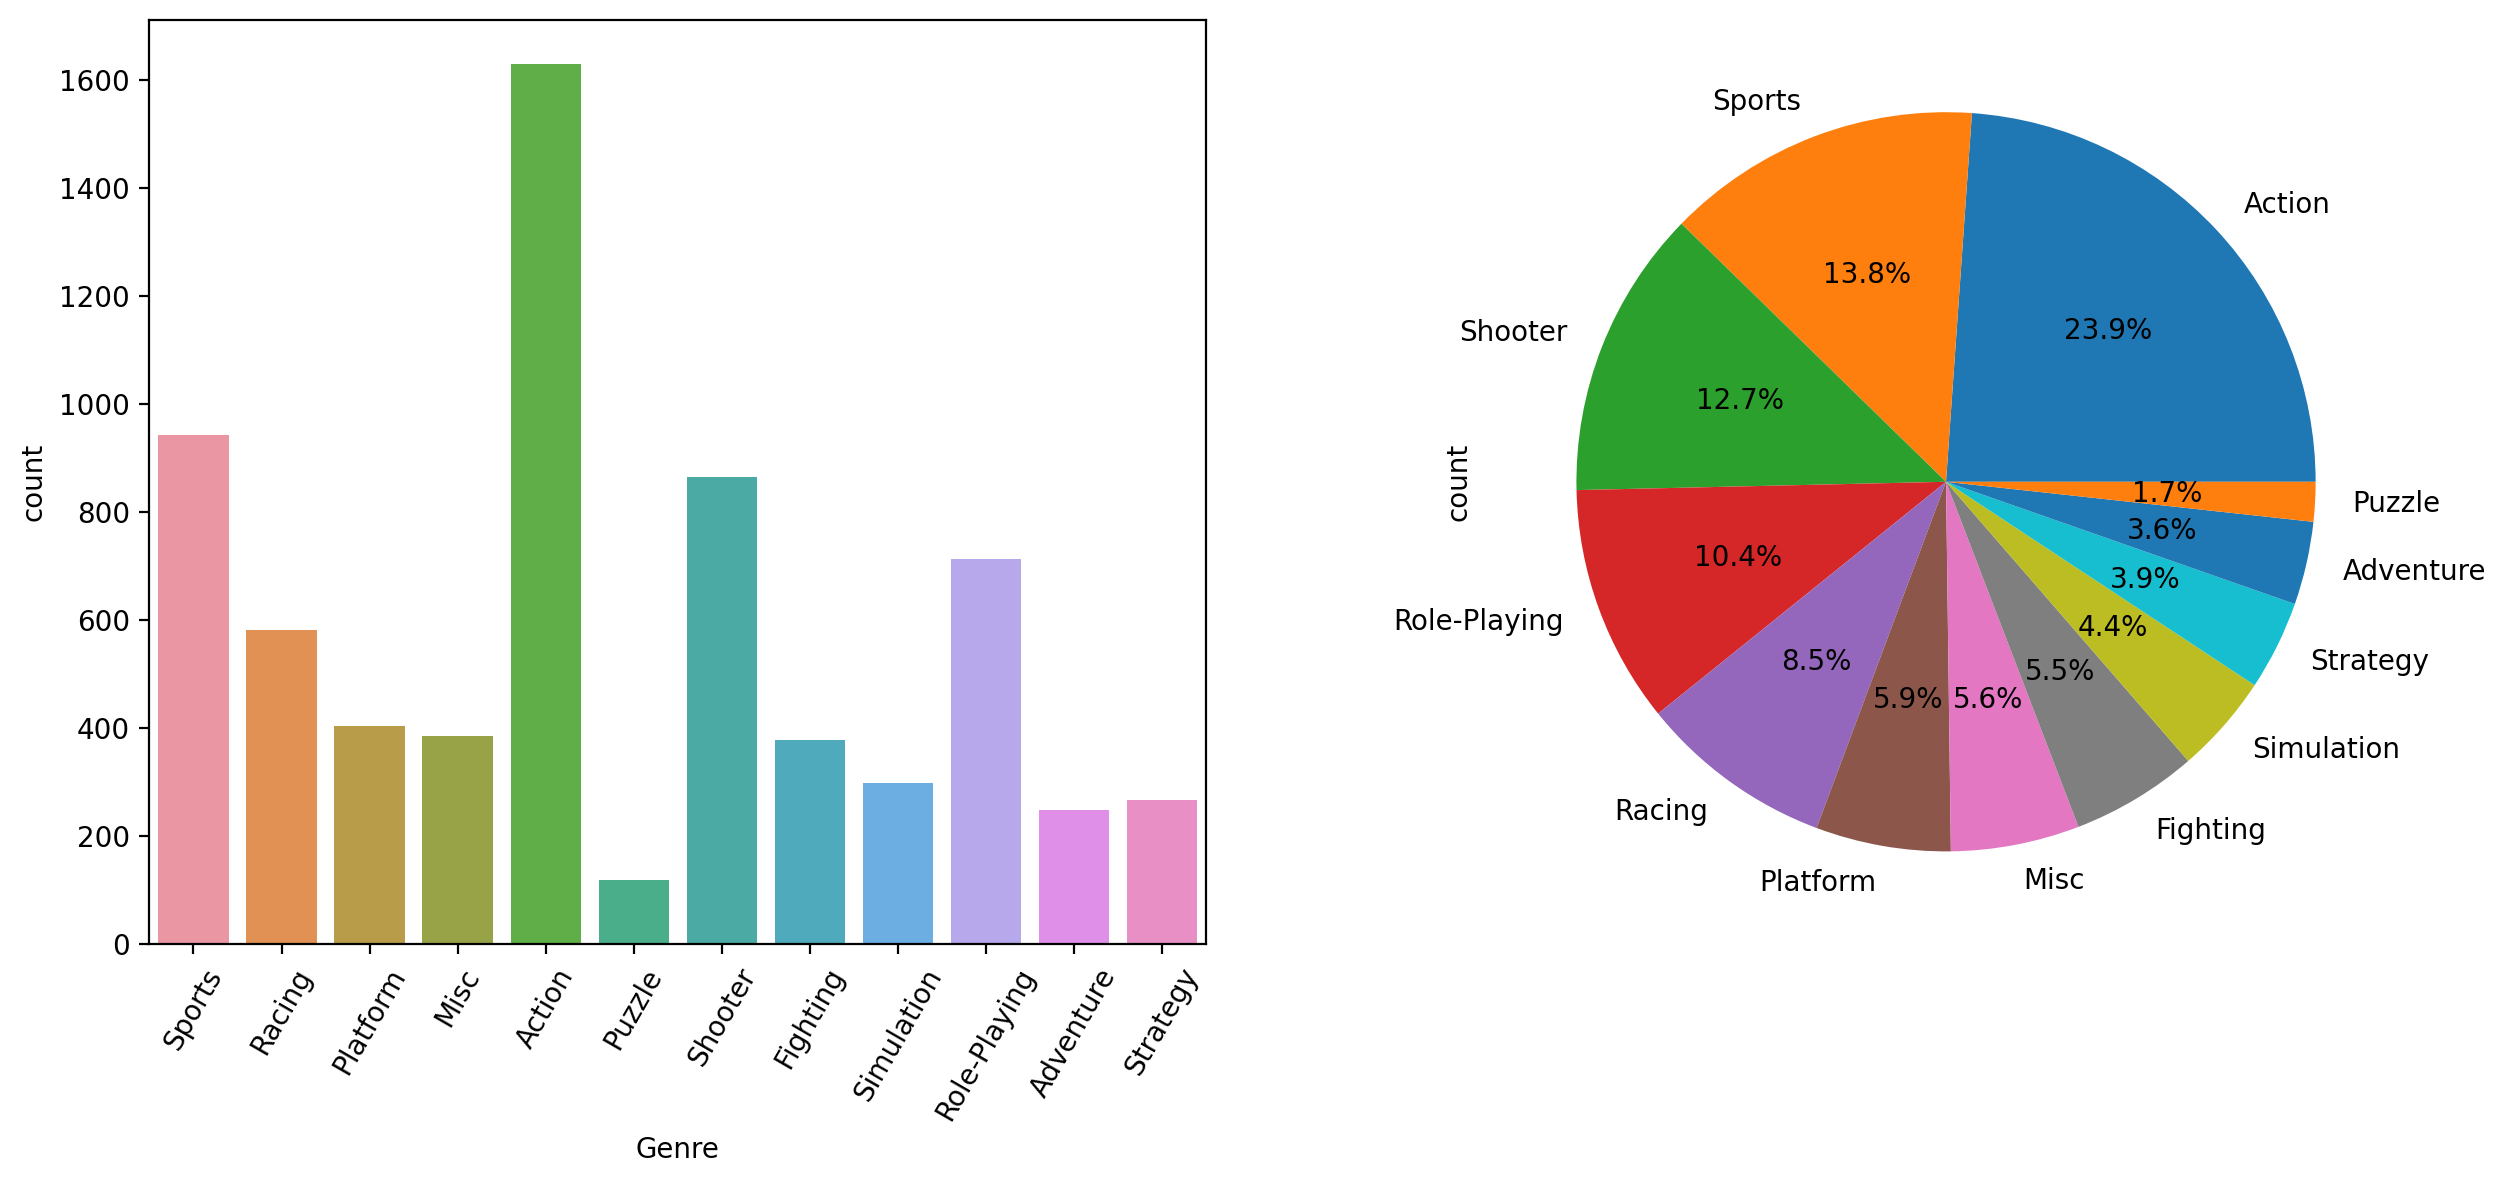

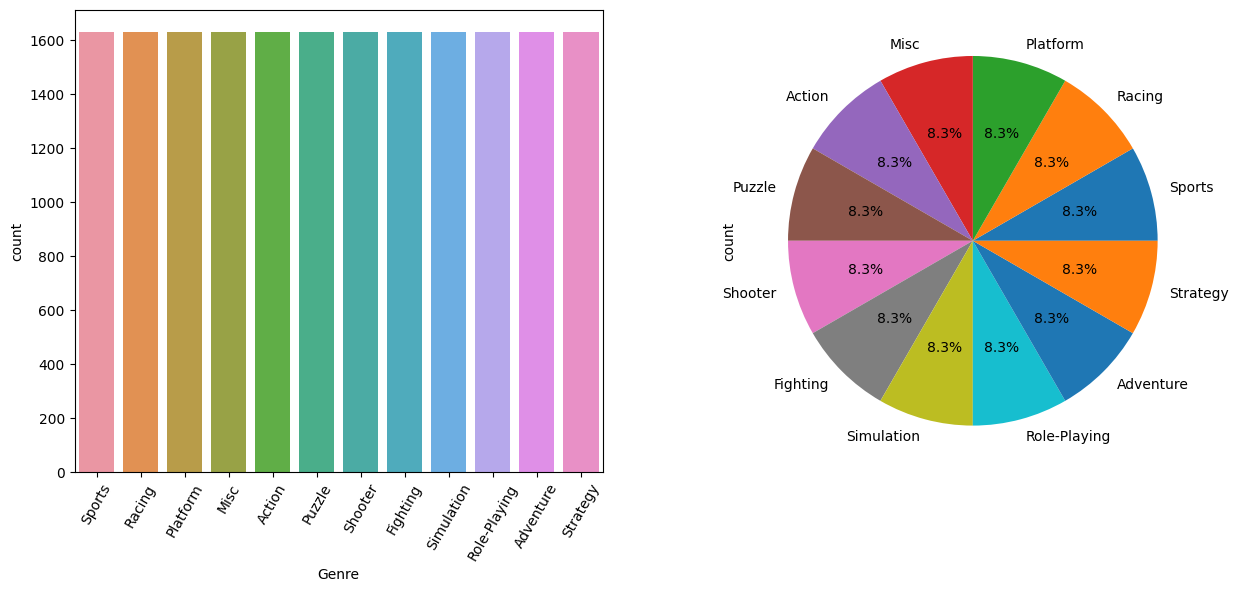

In [95]:
# plot genre distribution and apply SMOTE
plot_label_distribution("Genre")
x_genre, y_genre = apply_SMOTE("Genre")

### Logistic Regressor on Genre

In [70]:
run_classification_func(x_genre, y_genre)

Mislabeled points: 3012/3912
              precision    recall  f1-score   support

      Action       0.20      0.08      0.12       309
   Adventure       0.16      0.29      0.20       358
    Fighting       0.28      0.08      0.13       331
        Misc       0.20      0.22      0.21       311
    Platform       0.27      0.12      0.17       334
      Puzzle       0.22      0.40      0.28       326
      Racing       0.20      0.06      0.09       322
Role-Playing       0.38      0.23      0.29       344
     Shooter       0.28      0.24      0.26       310
  Simulation       0.21      0.14      0.17       323
      Sports       0.24      0.47      0.32       317
    Strategy       0.26      0.43      0.32       327

    accuracy                           0.23      3912
   macro avg       0.24      0.23      0.21      3912
weighted avg       0.24      0.23      0.21      3912

[[ 26  56   5  26   5  33  12  16  36  17  31  46]
 [  9 103   1  31   9  43   1  24  15  21  30  71]
 [

### KNN on Genre

In [71]:
run_classification_func(x_genre, y_genre, classifier=KNeighborsClassifier())

Mislabeled points: 1791/3912
              precision    recall  f1-score   support

      Action       0.20      0.17      0.18       309
   Adventure       0.61      0.80      0.69       358
    Fighting       0.51      0.63      0.57       331
        Misc       0.52      0.63      0.57       311
    Platform       0.56      0.61      0.58       334
      Puzzle       0.65      0.88      0.75       326
      Racing       0.46      0.41      0.43       322
Role-Playing       0.56      0.39      0.46       344
     Shooter       0.47      0.32      0.38       310
  Simulation       0.58      0.55      0.57       323
      Sports       0.58      0.37      0.45       317
    Strategy       0.65      0.70      0.68       327

    accuracy                           0.54      3912
   macro avg       0.53      0.54      0.52      3912
weighted avg       0.53      0.54      0.53      3912

[[ 51  25  36  18  25  21  32  25  26  19  12  19]
 [ 13 286   3   8   3   4   9   1   5  11   5  10]
 [

### Naive Bayes on Genre

In [72]:
run_classification_func(x_genre, y_genre, classifier=GaussianNB())

Mislabeled points: 3365/3912
              precision    recall  f1-score   support

      Action       0.25      0.01      0.02       309
   Adventure       0.13      0.40      0.19       358
    Fighting       0.13      0.13      0.13       331
        Misc       0.23      0.07      0.10       311
    Platform       0.27      0.05      0.08       334
      Puzzle       0.13      0.10      0.11       326
      Racing       0.21      0.02      0.03       322
Role-Playing       0.42      0.03      0.05       344
     Shooter       0.30      0.14      0.19       310
  Simulation       0.00      0.00      0.00       323
      Sports       0.19      0.02      0.04       317
    Strategy       0.12      0.68      0.21       327

    accuracy                           0.14      3912
   macro avg       0.20      0.14      0.10      3912
weighted avg       0.20      0.14      0.10      3912

[[  3 106  20   5   4  20   2   4  11   0   3 131]
 [  0 144   8   0   0   9   0   0   9   0   0 188]
 [

### Support Vector Classifier on Genre

In [73]:
run_classification_func(x_genre, y_genre, classifier=SVC())

Mislabeled points: 2766/3912
              precision    recall  f1-score   support

      Action       0.16      0.09      0.12       309
   Adventure       0.19      0.41      0.26       358
    Fighting       0.33      0.21      0.26       331
        Misc       0.32      0.23      0.26       311
    Platform       0.33      0.24      0.28       334
      Puzzle       0.29      0.47      0.36       326
      Racing       0.29      0.17      0.22       322
Role-Playing       0.40      0.29      0.34       344
     Shooter       0.33      0.29      0.31       310
  Simulation       0.24      0.20      0.22       323
      Sports       0.42      0.43      0.43       317
    Strategy       0.34      0.46      0.39       327

    accuracy                           0.29      3912
   macro avg       0.30      0.29      0.29      3912
weighted avg       0.30      0.29      0.29      3912

[[ 28  64  13  20  16  24  24  19  44  13  15  29]
 [ 17 146   2   7  14  44  11  27  18  16   3  53]
 [

### Decision Tree Classifier on Genre

In [74]:
x_genre, y_genre = use_decision_tree_classifier("Genre")
run_classification_func(x_genre, y_genre, classifier=DecisionTreeClassifier())

Cross-validation scores:  [0.23223443 0.23076923 0.23369963 0.20805861 0.22051282]
Mean score:  0.22505494505494505
Standard deviation:  0.009679205605810252
Mislabeled points: 0/6825
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      1.00      1.00       248
           2       1.00      1.00      1.00       378
           3       1.00      1.00      1.00       384
           4       1.00      1.00      1.00       403
           5       1.00      1.00      1.00       118
           6       1.00      1.00      1.00       581
           7       1.00      1.00      1.00       712
           8       1.00      1.00      1.00       864
           9       1.00      1.00      1.00       297
          10       1.00      1.00      1.00       943
          11       1.00      1.00      1.00       267

    accuracy                           1.00      6825
   macro avg       1.00      1.00      1.00      6825
weig

### Platform

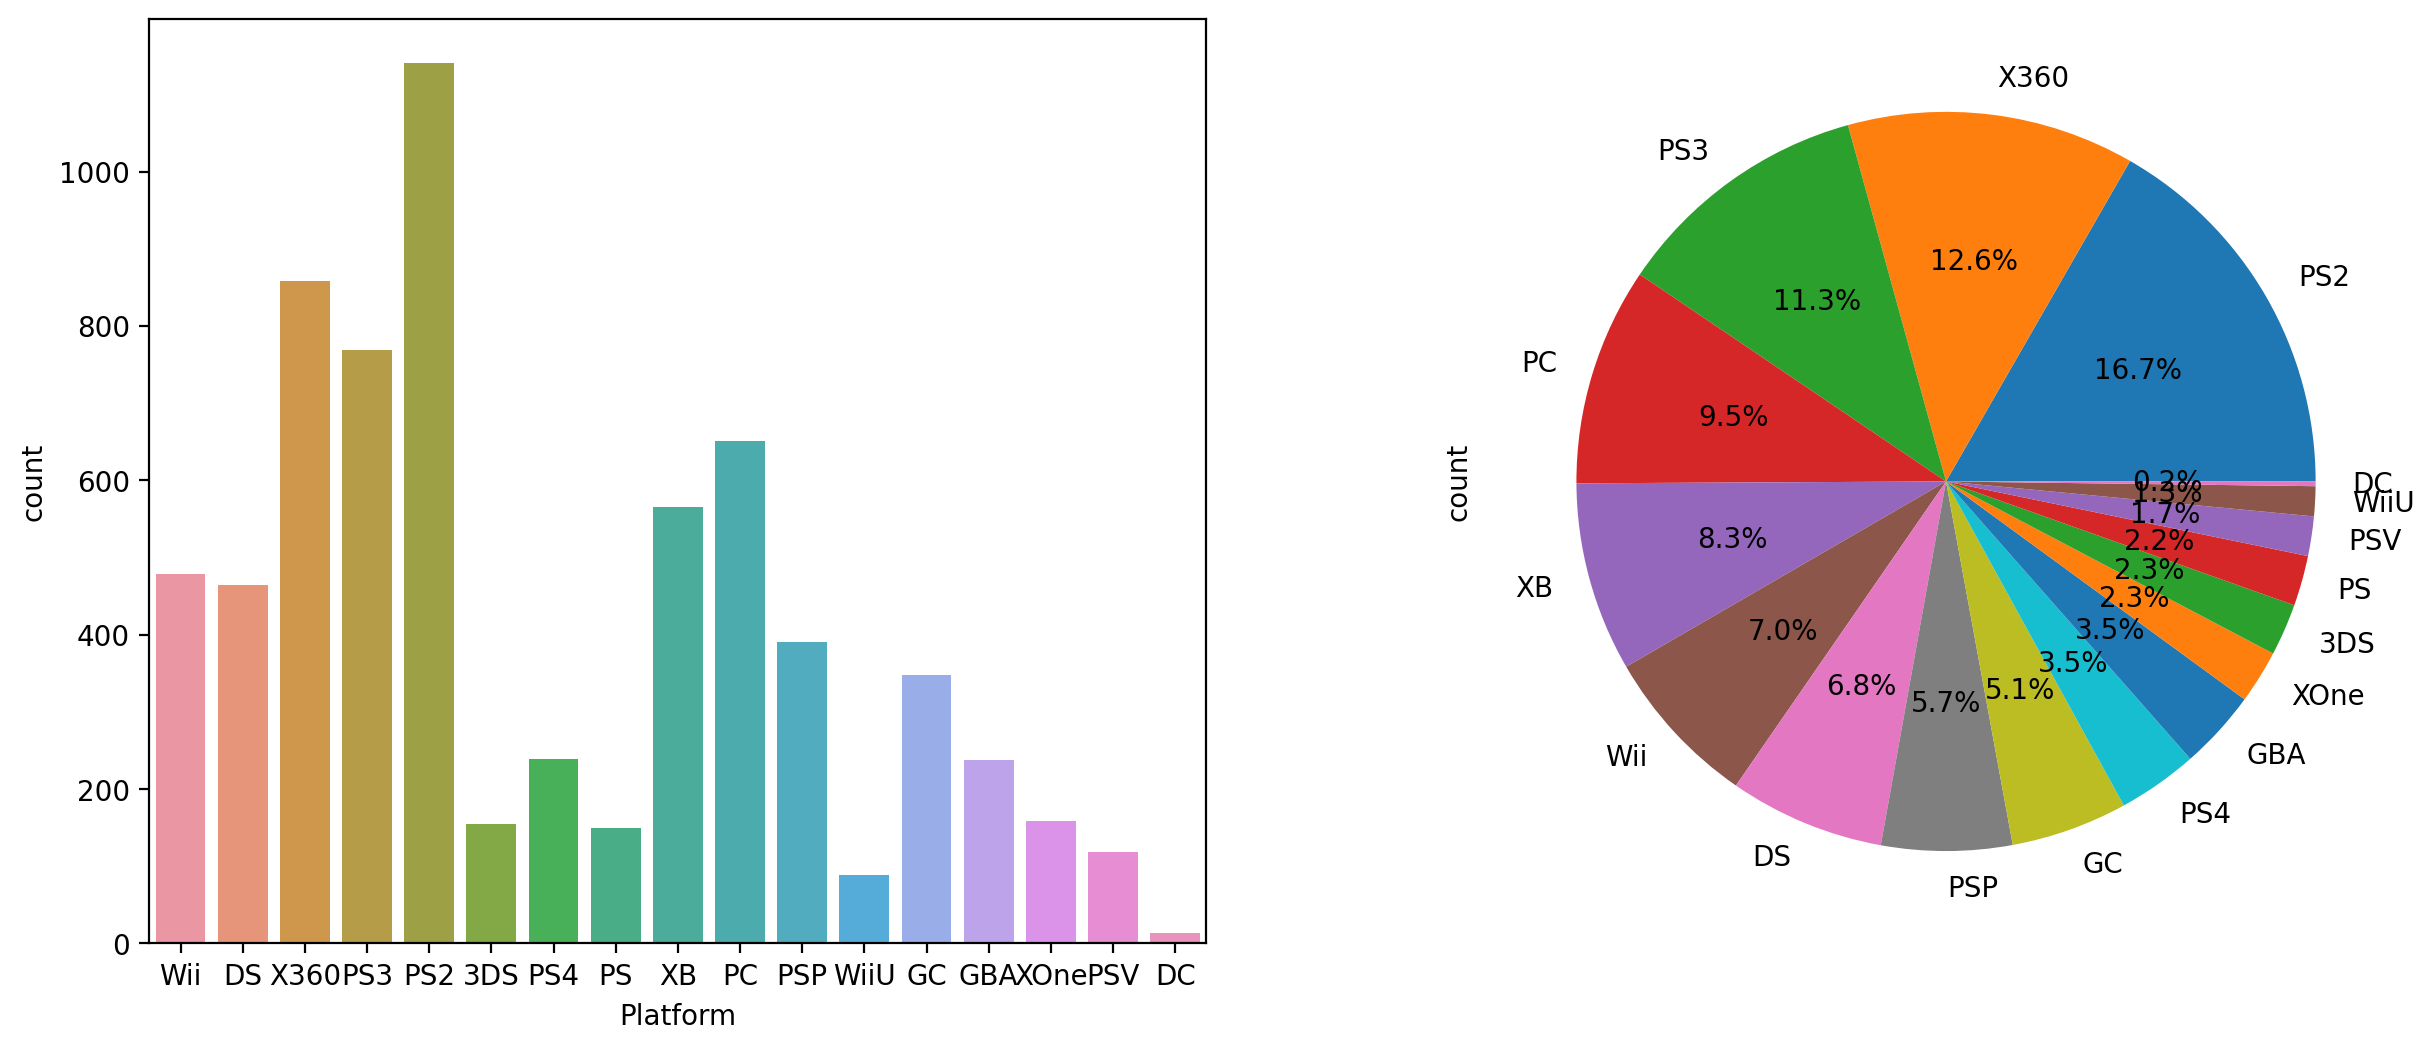

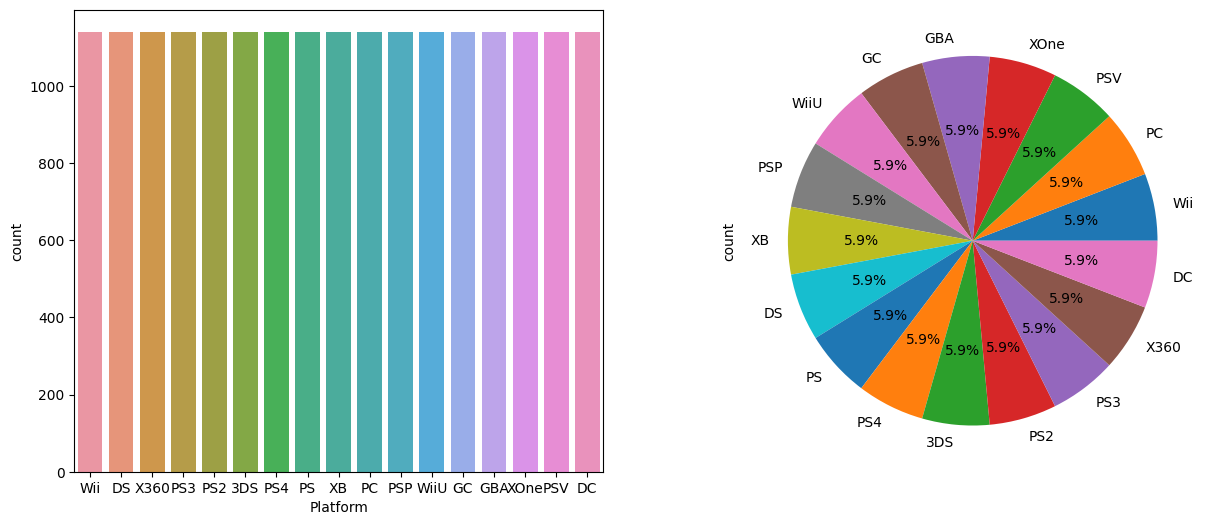

In [75]:
# plot platform distribution and apply SMOTE
plot_label_distribution("Platform")
x_platform, y_platform = apply_SMOTE("Platform")

### Logistic regression on Platform

In [76]:
run_classification_func(x_platform, y_platform)

Mislabeled points: 2065/3876
              precision    recall  f1-score   support

         3DS       0.46      0.38      0.42       220
          DC       0.74      0.93      0.82       242
          DS       0.26      0.22      0.24       229
         GBA       0.42      0.55      0.48       214
          GC       0.32      0.23      0.27       199
          PC       0.59      0.77      0.67       216
          PS       0.44      0.69      0.54       226
         PS2       0.47      0.48      0.47       224
         PS3       0.46      0.21      0.29       242
         PS4       0.59      0.38      0.46       232
         PSP       0.34      0.22      0.27       241
         PSV       0.46      0.60      0.52       247
         Wii       0.34      0.29      0.31       235
        WiiU       0.61      0.21      0.31       226
        X360       0.51      0.56      0.53       230
          XB       0.39      0.64      0.48       220
        XOne       0.49      0.58      0.53       23

### KNN on Platform

In [77]:
run_classification_func(x_platform, y_platform, classifier=KNeighborsClassifier())

Mislabeled points: 1403/3876
              precision    recall  f1-score   support

         3DS       0.63      0.84      0.72       220
          DC       0.99      1.00      0.99       242
          DS       0.43      0.50      0.46       229
         GBA       0.57      0.71      0.63       214
          GC       0.47      0.62      0.54       199
          PC       0.84      0.60      0.70       216
          PS       0.75      0.89      0.81       226
         PS2       0.54      0.28      0.37       224
         PS3       0.52      0.43      0.47       242
         PS4       0.71      0.73      0.72       232
         PSP       0.56      0.50      0.53       241
         PSV       0.73      0.93      0.82       247
         Wii       0.46      0.38      0.42       235
        WiiU       0.74      0.85      0.79       226
        X360       0.54      0.39      0.45       230
          XB       0.51      0.38      0.43       220
        XOne       0.73      0.79      0.76       23

### Naive Bayes on Platform

In [78]:
run_classification_func(x_platform, y_platform, classifier=GaussianNB())

Mislabeled points: 2953/3876
              precision    recall  f1-score   support

         3DS       0.24      0.05      0.08       220
          DC       0.58      0.88      0.70       242
          DS       0.38      0.02      0.04       229
         GBA       0.11      0.07      0.09       214
          GC       0.21      0.06      0.09       199
          PC       0.64      0.33      0.44       216
          PS       0.72      0.18      0.29       226
         PS2       0.47      0.04      0.07       224
         PS3       0.34      0.04      0.07       242
         PS4       0.45      0.12      0.20       232
         PSP       0.36      0.13      0.19       241
         PSV       0.23      0.59      0.33       247
         Wii       0.16      0.05      0.08       235
        WiiU       0.32      0.16      0.21       226
        X360       0.31      0.11      0.16       230
          XB       0.11      0.87      0.20       220
        XOne       0.25      0.27      0.26       23

### Support Vector Classifier on Plaform

In [79]:
run_classification_func(x_platform, y_platform, classifier=SVC())

Mislabeled points: 1864/3876
              precision    recall  f1-score   support

         3DS       0.33      0.55      0.41       220
          DC       0.91      1.00      0.95       242
          DS       0.30      0.32      0.31       229
         GBA       0.51      0.44      0.47       214
          GC       0.39      0.41      0.40       199
          PC       0.75      0.72      0.73       216
          PS       0.61      0.73      0.67       226
         PS2       0.60      0.33      0.43       224
         PS3       0.56      0.34      0.42       242
         PS4       0.62      0.47      0.53       232
         PSP       0.42      0.34      0.38       241
         PSV       0.58      0.64      0.61       247
         Wii       0.36      0.29      0.32       235
        WiiU       0.58      0.58      0.58       226
        X360       0.48      0.56      0.52       230
          XB       0.37      0.47      0.41       220
        XOne       0.59      0.61      0.60       23

### Decision Tree on Platform

In [80]:
x_platform, y_platform = use_decision_tree_classifier("Platform")
run_classification_func(x_platform, y_platform, classifier=DecisionTreeClassifier())

Cross-validation scores:  [0.44835165 0.45128205 0.46153846 0.45054945 0.45128205]
Mean score:  0.4526007326007326
Standard deviation:  0.004596157404060993
Mislabeled points: 0/6825
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00       464
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       348
           5       1.00      1.00      1.00       651
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00      1140
           8       1.00      1.00      1.00       769
           9       1.00      1.00      1.00       239
          10       1.00      1.00      1.00       390
          11       1.00      1.00      1.00       118
          12       1.00      1.00      1.00       479
          13       1.00      1.00      1.00        89
      

## 4. Use relevant variables and other non-relevant variables to form groups at each instance

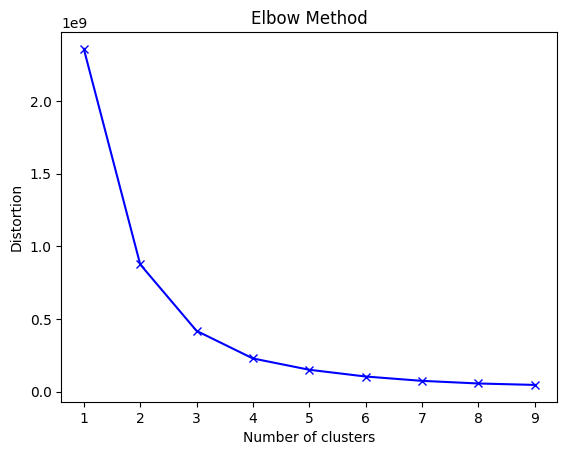

In [81]:
distortions = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numeric)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

### Helper functions for clustering tests

In [82]:
relevant_cat_variables = ["Rating", "Genre", "Platform"]

def run_clustering_func(label, algo = KMeans(n_clusters=3, random_state=42)):
    scaler = StandardScaler()
    scaled_df_numeric = scaler.fit_transform(df_numeric)
    
    cat_labels = algo.fit_predict(scaled_df_numeric)
    
    y_true = df[label]

    
    # Calculate the v-measure score
    v_measure = v_measure_score(y_true, cat_labels)
    print(f'External Evaluation Measures')
    print(f'********************************')
    print(f'V-measure Score: {v_measure:.4f}')
    # Calculate the Rand index score
    rand_index = adjusted_rand_score(y_true, cat_labels)
    print(f'Rand Index Score: {rand_index:.4f}')
    # Calculate the mutual information score
    mi_score = adjusted_mutual_info_score(y_true, cat_labels)
    print(f'Mutual Information Score: {mi_score:.4f}\n')
    # Calculate the Davies-Bouldin index
    
    db_score = davies_bouldin_score(scaled_df_numeric, cat_labels)
    print(f'Internal Evaluation Measures')
    print(f'********************************')
    print(f'Davies-Bouldin Index: {db_score:.4f}')
    # Calculate the Silhouette coefficient
    s_score = silhouette_score(scaled_df_numeric, cat_labels)
    print(f'Silhouette Coefficient: {s_score:.4f}')
    c_score = calinski_harabasz_score(scaled_df_numeric, cat_labels)
    print(f'Calinski Harabasz Score: {c_score:.4f}')

    

### Rating
### KMeans on rating, n_clusters = 3

In [83]:
run_clustering_func("Rating")

External Evaluation Measures
********************************
V-measure Score: 0.0099
Rand Index Score: 0.0065
Mutual Information Score: 0.0093

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.2598
Silhouette Coefficient: 0.2431
Calinski Harabasz Score: 1863.6843


### KMeans on rating, n_clusters = 2

In [84]:
run_clustering_func("Rating", algo = KMeans(n_clusters=2, random_state=42))

External Evaluation Measures
********************************
V-measure Score: 0.0076
Rand Index Score: 0.0028
Mutual Information Score: 0.0072

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.0842
Silhouette Coefficient: 0.7489
Calinski Harabasz Score: 1977.3168


### KMeans on rating, n_clusters = 4

In [85]:
run_clustering_func("Rating", algo = KMeans(n_clusters=4, random_state=42))

External Evaluation Measures
********************************
V-measure Score: 0.0148
Rand Index Score: 0.0100
Mutual Information Score: 0.0140

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.1553
Silhouette Coefficient: 0.2713
Calinski Harabasz Score: 1987.9294


### Agglomerative Clustering on rating, n_clusters = 3

In [86]:
run_clustering_func("Rating", algo=AgglomerativeClustering(n_clusters=3, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0006
Rand Index Score: 0.0000
Mutual Information Score: -0.0001

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.2115
Silhouette Coefficient: 0.9143
Calinski Harabasz Score: 573.8621


### Agglomerative Clustering on rating, n_clusters = 2

In [87]:
run_clustering_func("Rating", algo=AgglomerativeClustering(n_clusters=2, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0003
Rand Index Score: -0.0000
Mutual Information Score: -0.0000

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.0257
Silhouette Coefficient: 0.9619
Calinski Harabasz Score: 794.2076


### Agglomerative Clustering on rating, n_clusters = 4

In [88]:
run_clustering_func("Rating", algo=AgglomerativeClustering(n_clusters=4, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0009
Rand Index Score: 0.0000
Mutual Information Score: -0.0000

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.0544
Silhouette Coefficient: 0.8953
Calinski Harabasz Score: 387.6862


### DBSCAN on rating

In [89]:
run_clustering_func("Rating", algo=DBSCAN(eps=0.2, min_samples=5))

External Evaluation Measures
********************************
V-measure Score: 0.0197
Rand Index Score: -0.0040
Mutual Information Score: 0.0081

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.4909
Silhouette Coefficient: -0.5243
Calinski Harabasz Score: 6.1030


### Genre

### KMeans on genre, n_clusters = 3

In [96]:
run_clustering_func("Genre")

External Evaluation Measures
********************************
V-measure Score: 0.0081
Rand Index Score: 0.0023
Mutual Information Score: 0.0070

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.2598
Silhouette Coefficient: 0.2431
Calinski Harabasz Score: 1863.6843


### KMeans on genre, n_clusters = 2

In [97]:
run_clustering_func("Genre", algo = KMeans(n_clusters=2, random_state=42))

External Evaluation Measures
********************************
V-measure Score: 0.0027
Rand Index Score: -0.0009
Mutual Information Score: 0.0020

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.0842
Silhouette Coefficient: 0.7489
Calinski Harabasz Score: 1977.3168


### KMeans on genre, n_clusters = 4

In [98]:
run_clustering_func("Genre", algo = KMeans(n_clusters=4, random_state=42))

External Evaluation Measures
********************************
V-measure Score: 0.0095
Rand Index Score: -0.0004
Mutual Information Score: 0.0079

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.1553
Silhouette Coefficient: 0.2713
Calinski Harabasz Score: 1987.9294


### Agglomerative Clustering on genre, n_clusters = 3

In [99]:
run_clustering_func("Genre", algo=AgglomerativeClustering(n_clusters=3, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0006
Rand Index Score: -0.0001
Mutual Information Score: -0.0001

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.2115
Silhouette Coefficient: 0.9143
Calinski Harabasz Score: 573.8621


### Agglomerative Clustering on genre, n_clusters = 2

In [100]:
run_clustering_func("Genre", algo=AgglomerativeClustering(n_clusters=2, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0003
Rand Index Score: -0.0000
Mutual Information Score: -0.0000

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.0257
Silhouette Coefficient: 0.9619
Calinski Harabasz Score: 794.2076


### Agglomerative Clustering on genre, n_clusters = 4

In [101]:
run_clustering_func("Genre", algo=AgglomerativeClustering(n_clusters=4, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0008
Rand Index Score: -0.0001
Mutual Information Score: -0.0001

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.0544
Silhouette Coefficient: 0.8953
Calinski Harabasz Score: 387.6862


### DBSCAN on genre

In [102]:
run_clustering_func("Genre", algo=DBSCAN(eps=0.2, min_samples=5))

External Evaluation Measures
********************************
V-measure Score: 0.0296
Rand Index Score: 0.0091
Mutual Information Score: 0.0056

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.4909
Silhouette Coefficient: -0.5243
Calinski Harabasz Score: 6.1030


### Platform

### KMeans on platform, n_clusters = 3

In [103]:
run_clustering_func("Platform")

External Evaluation Measures
********************************
V-measure Score: 0.0099
Rand Index Score: 0.0043
Mutual Information Score: 0.0084

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.2598
Silhouette Coefficient: 0.2431
Calinski Harabasz Score: 1863.6843


### KMeans on platform, n_clusters = 2

In [104]:
run_clustering_func("Platform", algo = KMeans(n_clusters=2, random_state=42))

External Evaluation Measures
********************************
V-measure Score: 0.0049
Rand Index Score: 0.0004
Mutual Information Score: 0.0040

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.0842
Silhouette Coefficient: 0.7489
Calinski Harabasz Score: 1977.3168


### KMeans on platform, n_clusters = 4

In [105]:
run_clustering_func("Platform", algo = KMeans(n_clusters=4, random_state=42))

External Evaluation Measures
********************************
V-measure Score: 0.0155
Rand Index Score: 0.0050
Mutual Information Score: 0.0135

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.1553
Silhouette Coefficient: 0.2713
Calinski Harabasz Score: 1987.9294


### Agglomerative Clustering on platform, n_clusters = 3

In [106]:
run_clustering_func("Platform", algo=AgglomerativeClustering(n_clusters=3, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0007
Rand Index Score: -0.0001
Mutual Information Score: -0.0000

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.2115
Silhouette Coefficient: 0.9143
Calinski Harabasz Score: 573.8621


### Agglomerative Clustering on platform, n_clusters = 2

In [107]:
run_clustering_func("Platform", algo=AgglomerativeClustering(n_clusters=2, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0003
Rand Index Score: 0.0000
Mutual Information Score: 0.0000

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.0257
Silhouette Coefficient: 0.9619
Calinski Harabasz Score: 794.2076


### Agglomerative Clustering on platform, n_clusters = 4

In [108]:
run_clustering_func("Platform", algo=AgglomerativeClustering(n_clusters=4, linkage='single'))

External Evaluation Measures
********************************
V-measure Score: 0.0007
Rand Index Score: -0.0001
Mutual Information Score: -0.0002

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 0.0544
Silhouette Coefficient: 0.8953
Calinski Harabasz Score: 387.6862


### DBSCAN on platform

In [109]:
run_clustering_func("Platform", algo=DBSCAN(eps=0.2, min_samples=5))

External Evaluation Measures
********************************
V-measure Score: 0.0446
Rand Index Score: 0.0080
Mutual Information Score: 0.0174

Internal Evaluation Measures
********************************
Davies-Bouldin Index: 1.4909
Silhouette Coefficient: -0.5243
Calinski Harabasz Score: 6.1030
